# Sub : AIDI_1100-Introduction to AI Development
## Prof : Bipin Aasi
### Assignment 3 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

In [4]:
df2 = pd.read_csv("data.csv")

In [3]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

#### CHecking the Datatypes of the Independent Variables

In [25]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [12]:
df.dtypes[df.dtypes == 'int64']

Y      int64
X85    int64
X94    int64
dtype: object

In [28]:
df.dtypes[df.dtypes == 'float64']

 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
                                                             ...   
 Net Income to Stockholder's Equity                         float64
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Equity to Liability                                        float64
Length: 93, dtype: object

In [33]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

## Data Pre-Processing

In [5]:
def rename_columns(df):
    """
    Renames DataFrame columns sequentially in the pattern:
    'Y', 'X1', 'X2', 'X3', etc.

    Args:
        df (pd.DataFrame): The DataFrame whose columns need renaming.

    Returns:
        pd.DataFrame: DataFrame with renamed columns.
    """
    new_column_names = ['Y'] + [f'X{i}' for i in range(1, len(df.columns))]
    df.columns = new_column_names
    return df

In [6]:
df = rename_columns(df)

In [9]:
df

Y        X1        X2        X3        X4        X5        X6        X7  \
0     1  0.370594  0.424389  0.405750  0.601457  0.601457  0.998969  0.796887   
1     1  0.464291  0.538214  0.516730  0.610235  0.610235  0.998946  0.797380   
2     1  0.426071  0.499019  0.472295  0.601450  0.601364  0.998857  0.796403   
3     1  0.399844  0.451265  0.457733  0.583541  0.583541  0.998700  0.796967   
4     1  0.465022  0.538432  0.522298  0.598783  0.598783  0.998973  0.797366   
...  ..       ...       ...       ...       ...       ...       ...       ...   
6814  0  0.493687  0.539468  0.543230  0.604455  0.604462  0.998992  0.797409   
6815  0  0.475162  0.538269  0.524172  0.598308  0.598308  0.998992  0.797414   
6816  0  0.472725  0.533744  0.520638  0.610444  0.610213  0.998984  0.797401   
6817  0  0.506264  0.559911  0.554045  0.607850  0.607850  0.999074  0.797500   
6818  0  0.493053  0.570105  0.549548  0.627409  0.627409  0.998080  0.801987   

            X8        X9  ...       X86       X87       X88       X89  \
0     0.808809  0.302646  ...  0.716845  0.009219  0.622879  0.601453   
1     0.809301  0.303556  ...  0.795297  0.008323  0.623652  0.610237   
2     0.808388  0.302035  ...  0.774670  0.040003  0.623841  0.601449   
3     0.808966  0.303350  ...  0.739555  0.003252  0.622929  0.583538   
4     0.809304  0.303475  ...  0.795016  0.003878  0.623521  0.598782   
...        ...       ...  ...       ...       ...       ...       ...   
6814  0.809331  0.303510  ...  0.799927  0.000466  0.623620  0.604455   
6815  0.809327  0.303520  ...  0.799748  0.001959  0.623931  0.598306   
6816  0.809317  0.303512  ...  0.797778  0.002840  0.624156  0.610441   
6817  0.809399  0.303498  ...  0.811808  0.002837  0.623957  0.607846   
6818  0.813800  0.313415  ...  0.815956  0.000707  0.626680  0.627408   

           X90       X91       X92       X93  X94       X95  
0     0.827890  0.290202  0.026601  0.564050    1  0.016469  
1     0.839969  0.283846  0.264577  0.570175    1  0.020794  
2     0.836774  0.290189  0.026555  0.563706    1  0.016474  
3     0.834697  0.281721  0.026697  0.564663    1  0.023982  
4     0.839973  0.278514  0.024752  0.575617    1  0.035490  
...        ...       ...       ...       ...  ...       ...  
6814  0.840359  0.279606  0.027064  0.566193    1  0.029890  
6815  0.840306  0.278132  0.027009  0.566018    1  0.038284  
6816  0.840138  0.275789  0.026791  0.565158    1  0.097649  
6817  0.841084  0.277547  0.026822  0.565302    1  0.044009  
6818  0.841019  0.275114  0.026793  0.565167    1  0.233902  

[6819 rows x 96 columns]

### Spearsman Rank especial case for binary data (Point - Bisteral Method)

#### Checking Correlation between continous independent variables and target categorical variable

In [10]:
def check_relation(df, binary_column):
    # Iterate through each column of the dataframe (excluding the binary column)
    for column in df.columns:
        if column != binary_column:
            # Calculate Point-Biserial Correlation
            correlation, p_value = pointbiserialr(df[binary_column], df[column])

            # Categorize the relation based on the correlation value
            if correlation < -0.05:
                relation = 'Strongly Negative'
            elif correlation > 0.05:
                relation = 'Strongly Positive'
            elif correlation == 0:
                relation = 'No Relation'
            elif -0.07 < correlation < 0:
                relation = 'Weak Negative'
            elif 0 < correlation < 0.5:
                relation = 'Weak Positive'

            # Print the result
            print(f"Column: {column}, Correlation: {correlation:.4f}, P-value: {p_value:.4f}, Relation: {relation}")

In [11]:
check_relation(df, 'Y')

Column: X1, Correlation: -0.2608, P-value: 0.0000, Relation: Strongly Negative
Column: X2, Correlation: -0.2829, P-value: 0.0000, Relation: Strongly Negative
Column: X3, Correlation: -0.2731, P-value: 0.0000, Relation: Strongly Negative
Column: X4, Correlation: -0.1000, P-value: 0.0000, Relation: Strongly Negative
Column: X5, Correlation: -0.0994, P-value: 0.0000, Relation: Strongly Negative
Column: X6, Correlation: -0.0002, P-value: 0.9849, Relation: Weak Negative
Column: X7, Correlation: -0.0085, P-value: 0.4820, Relation: Weak Negative
Column: X8, Correlation: -0.0089, P-value: 0.4646, Relation: Weak Negative
Column: X9, Correlation: -0.0166, P-value: 0.1707, Relation: Weak Negative
Column: X10, Correlation: -0.0084, P-value: 0.4882, Relation: Weak Negative
Column: X11, Correlation: -0.0061, P-value: 0.6155, Relation: Weak Negative
Column: X12, Correlation: -0.0242, P-value: 0.0454, Relation: Weak Negative
Column: X13, Correlation: -0.0724, P-value: 0.0000, Relation: Strongly Negati

C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


### Visualising the Spread of Continous Variable across Categorical Variable using Jitter Plot

### Checking with Jitter Plot 
###### Visually trying to compare if there is any boundary range for Categorical Variable in Continous Variable

In [20]:
def plot_strip_plots(df, binary_column):
    # Iterate through each column of the dataframe (excluding the binary column)
    for column in df.columns:
        if column != binary_column and df[column].dtype != 'O':  # Skip binary column and non-numeric columns
            # Create the strip plot for each continuous variable against the binary column
            plt.figure(figsize=(8, 6))
            sns.stripplot(x=binary_column, y=column, data=df, jitter=True)
            plt.title(f'{binary_column} vs. {column}')
            plt.show()

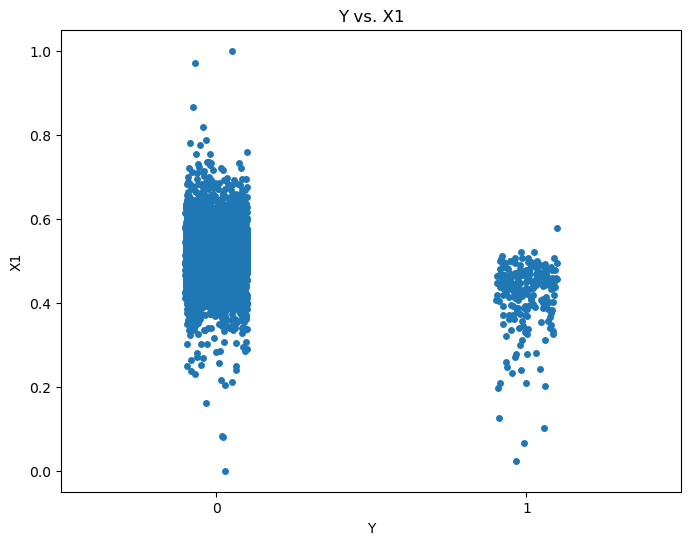

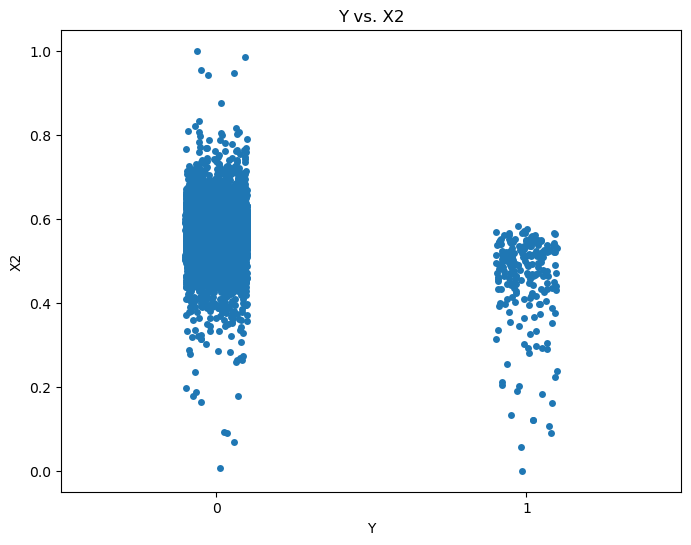

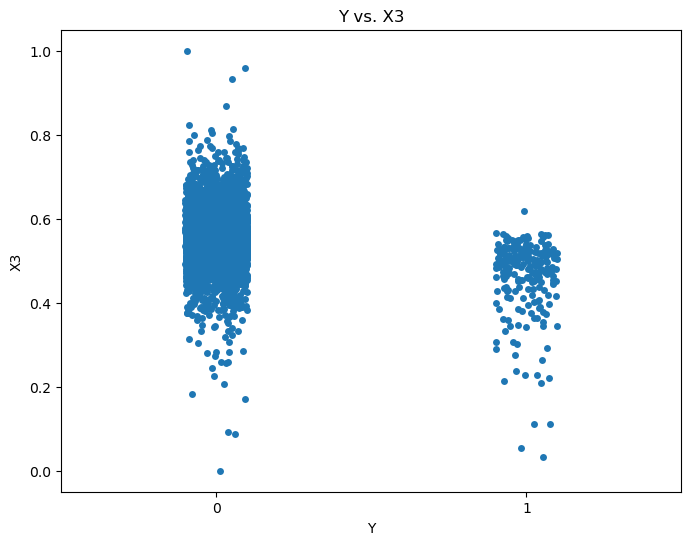

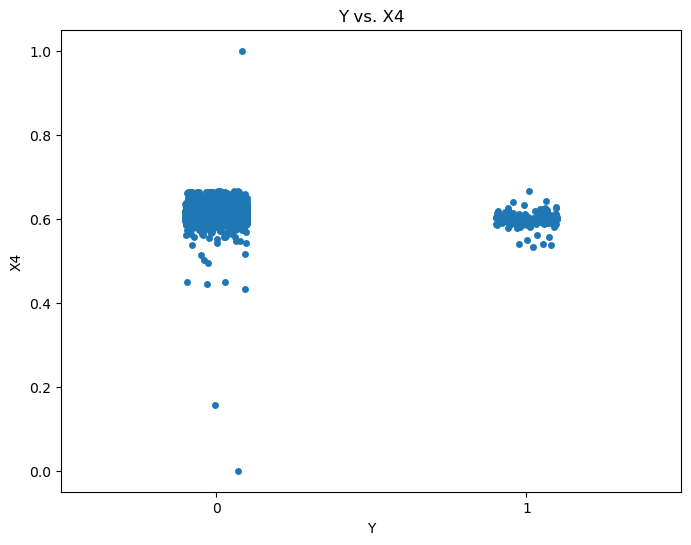

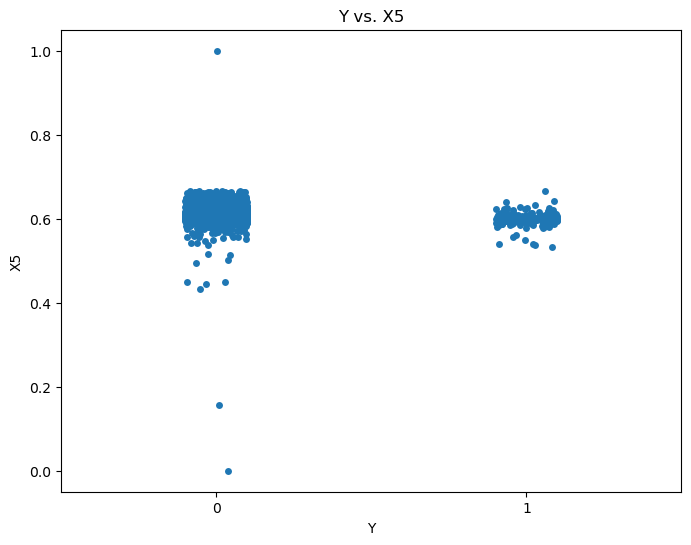

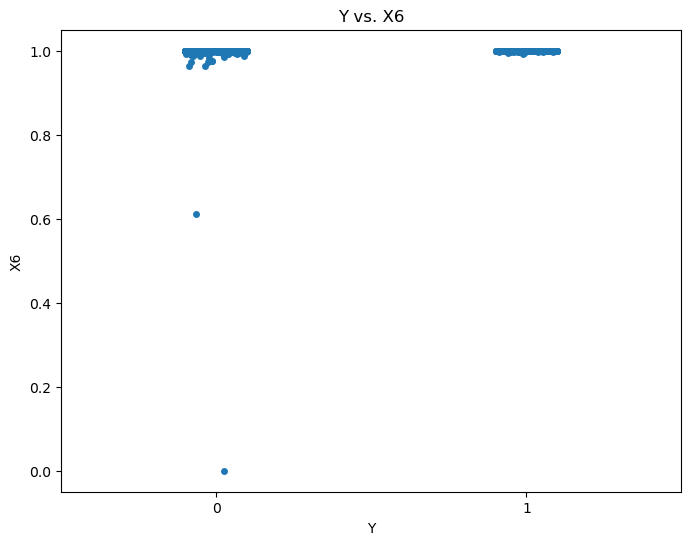

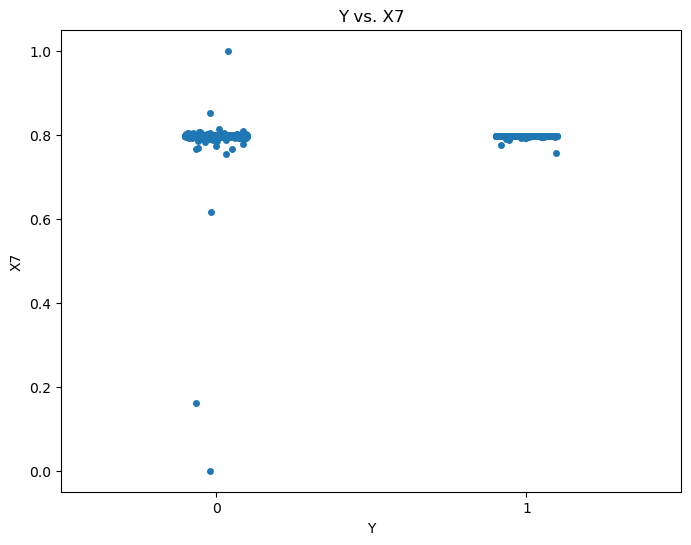

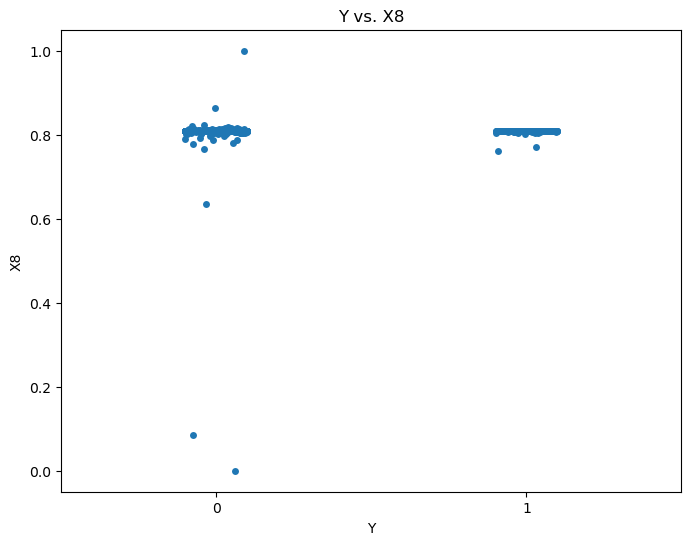

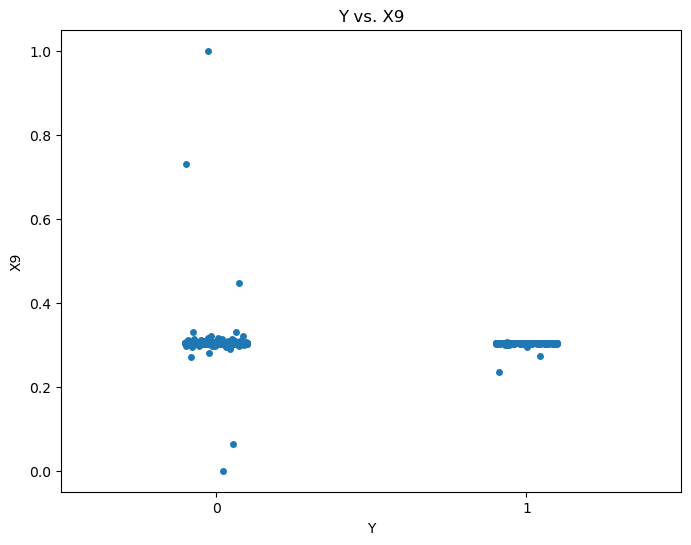

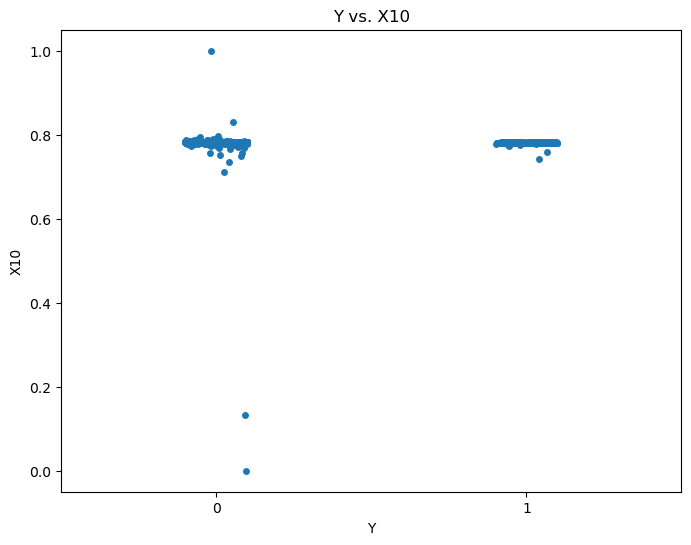

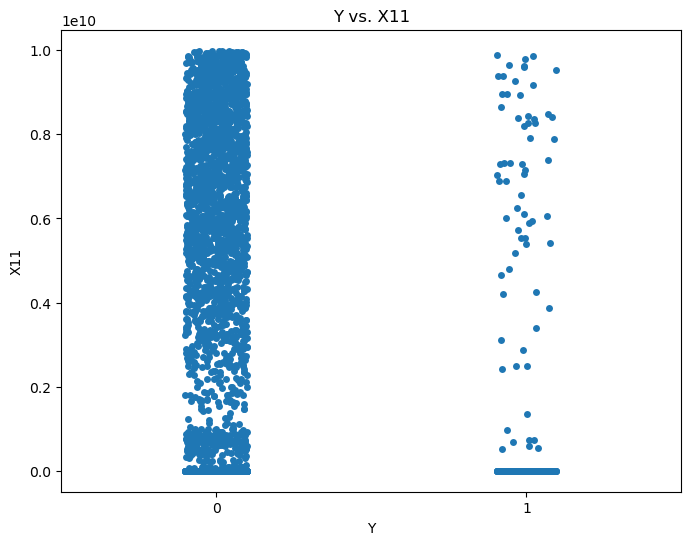

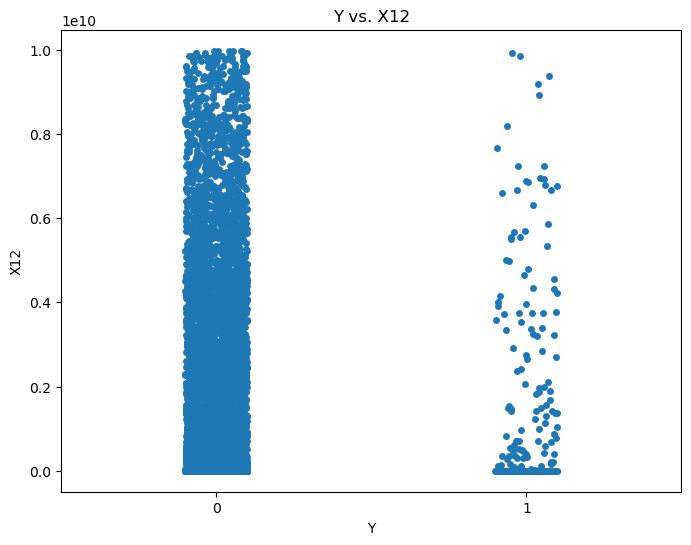

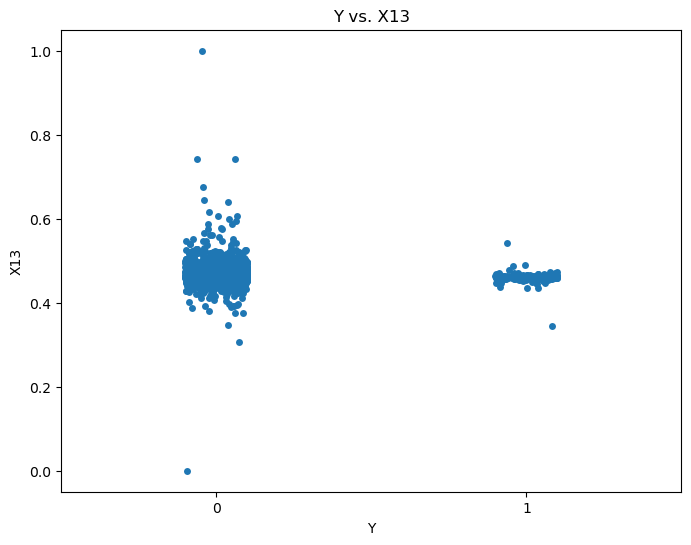

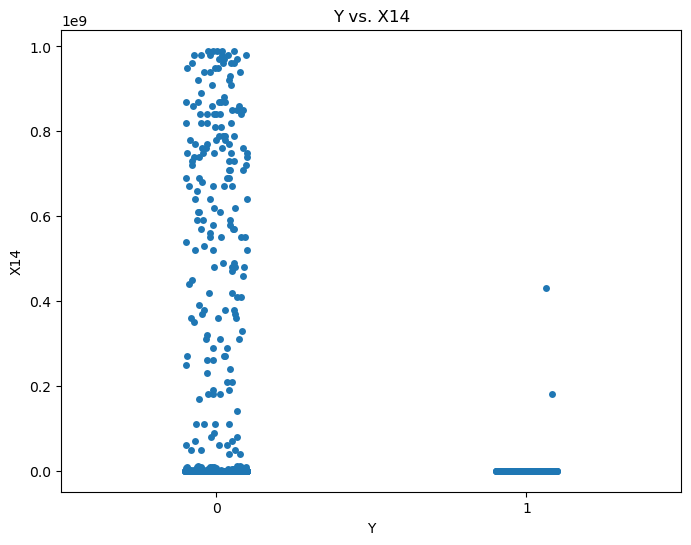

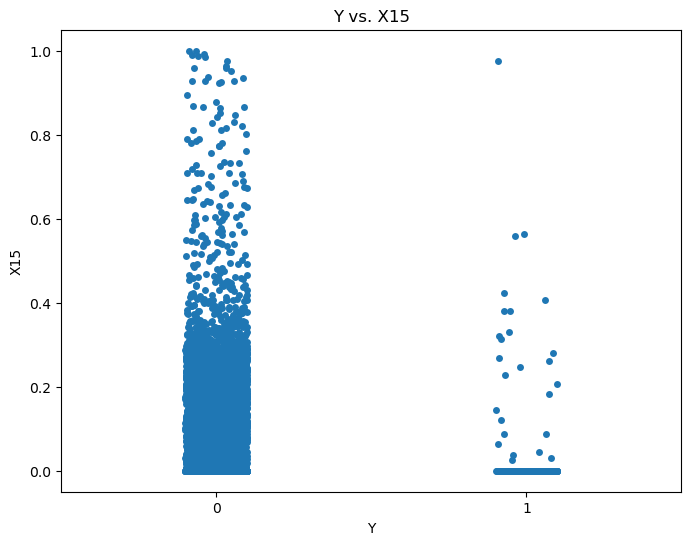

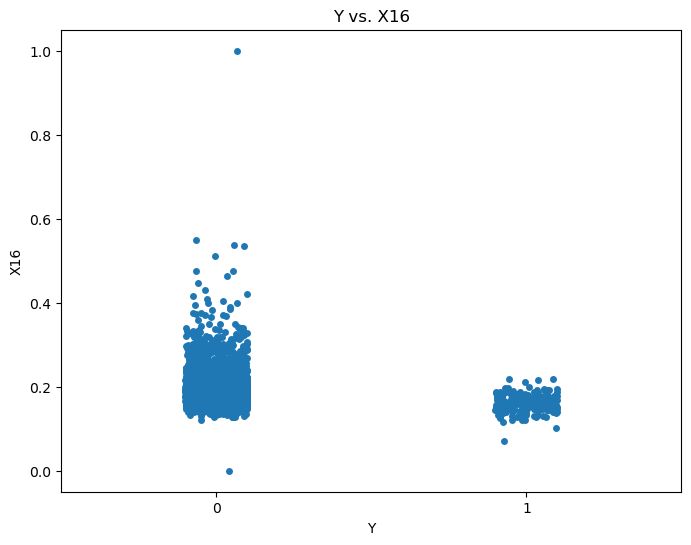

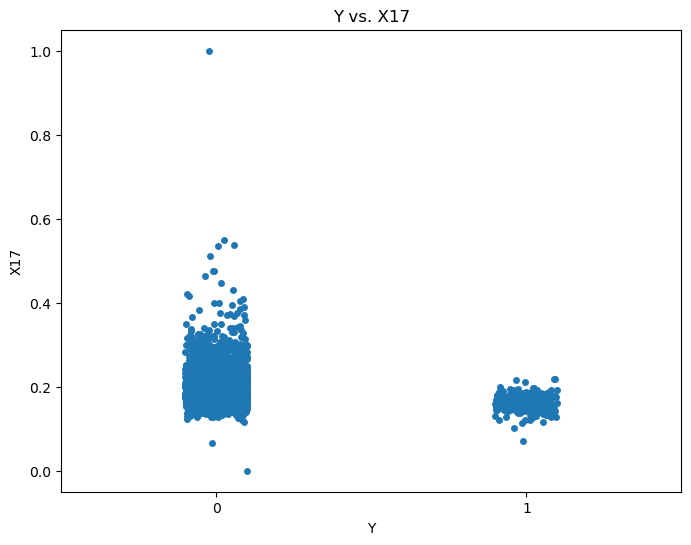

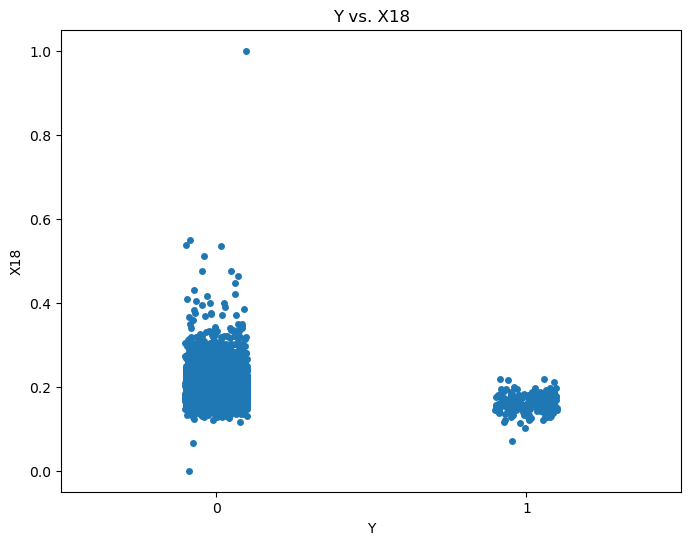

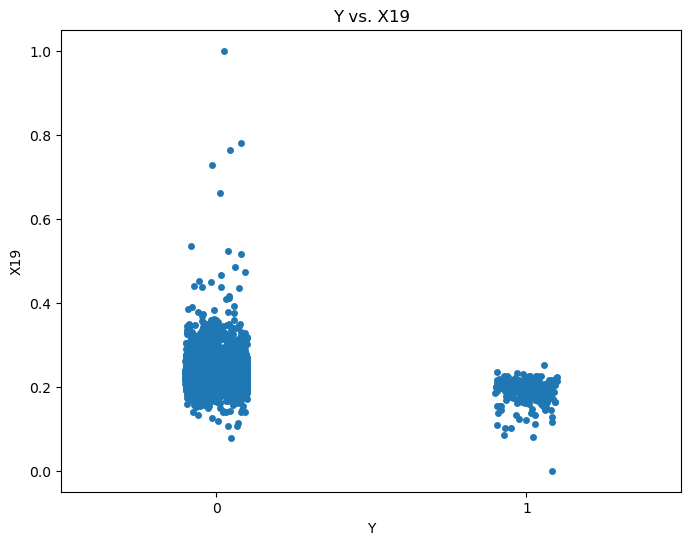

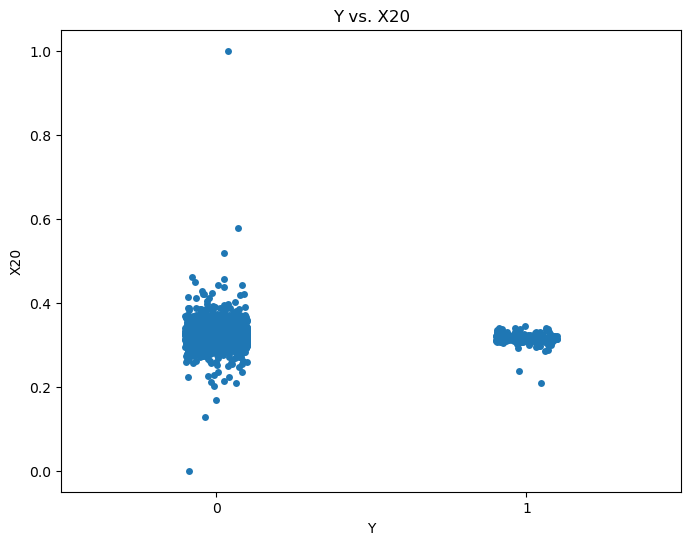

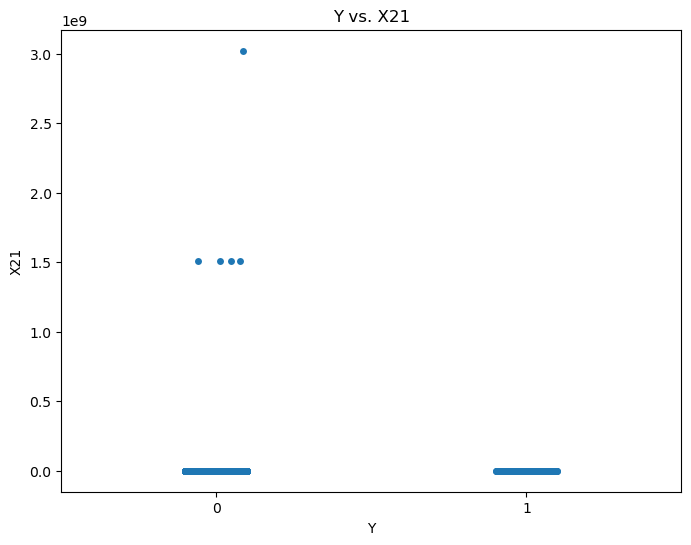

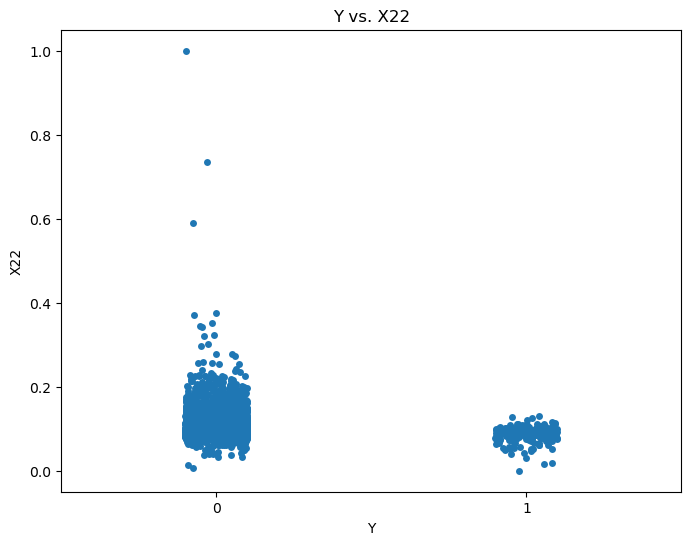

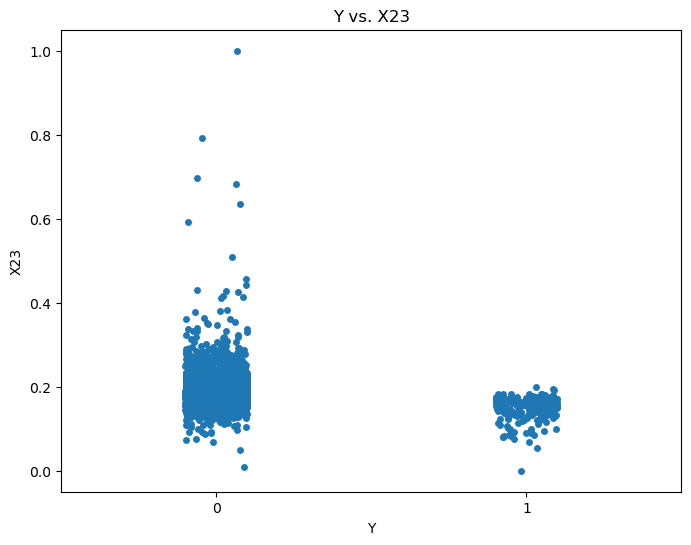

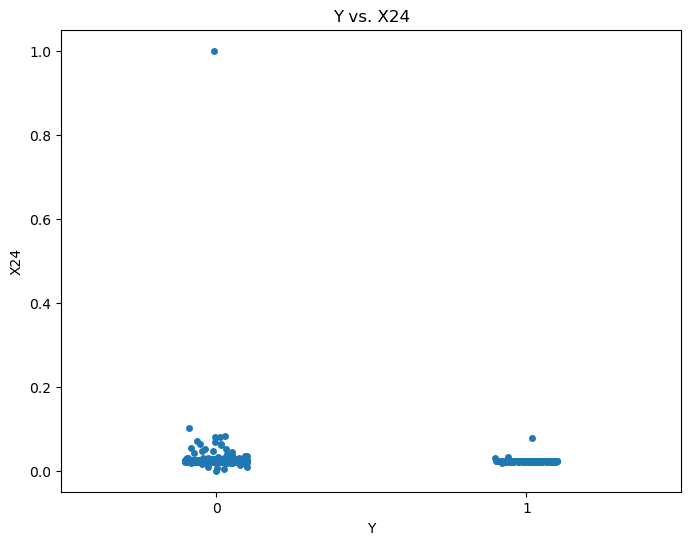

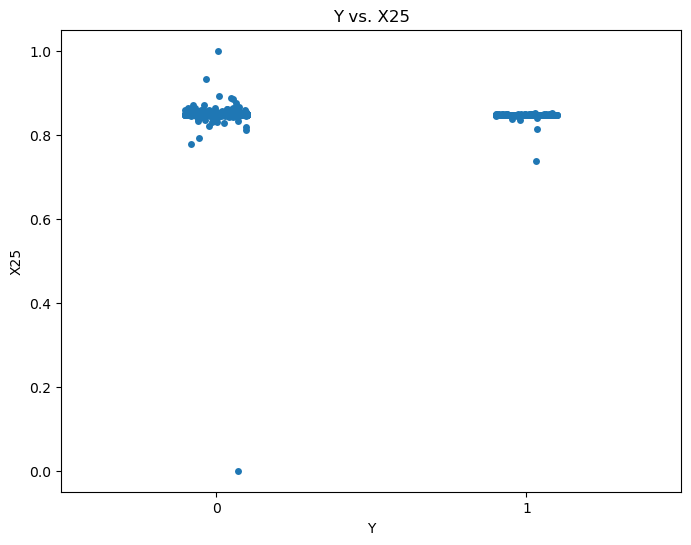

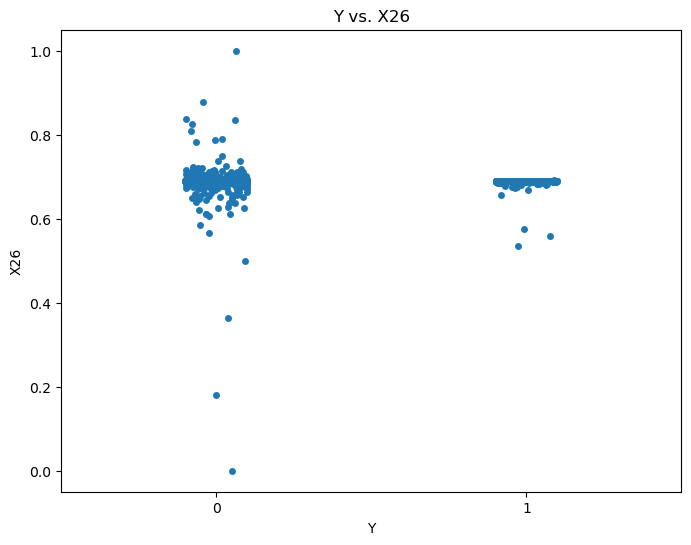

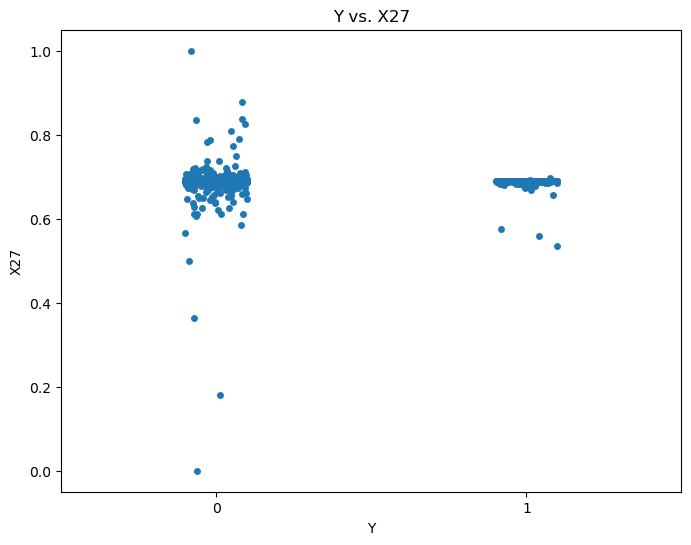

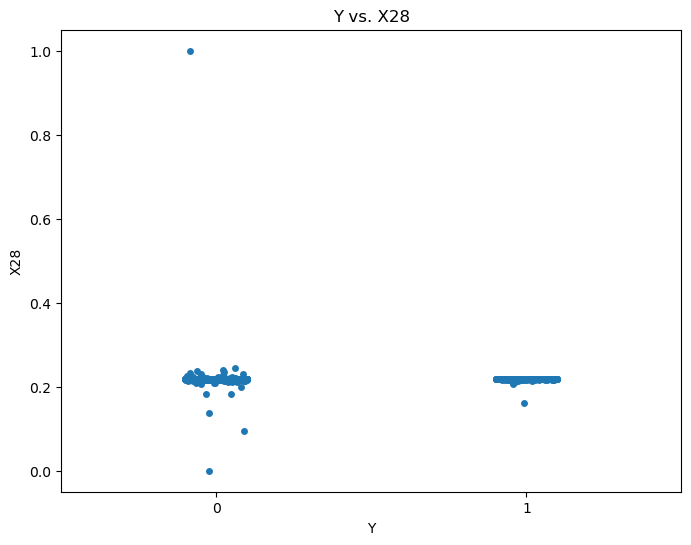

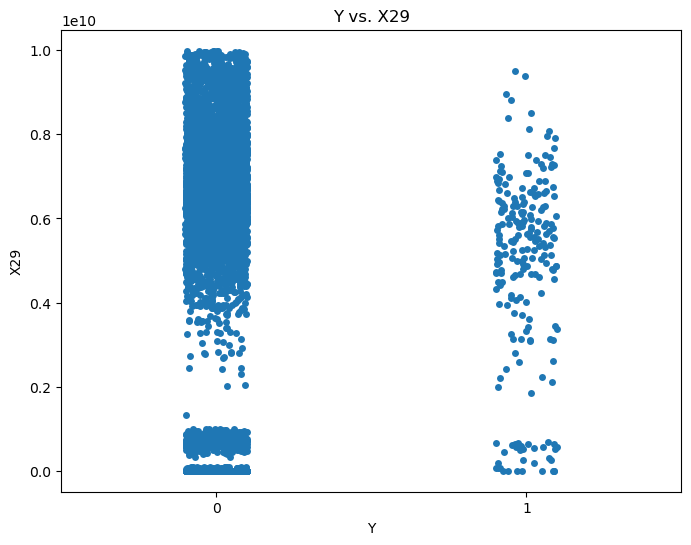

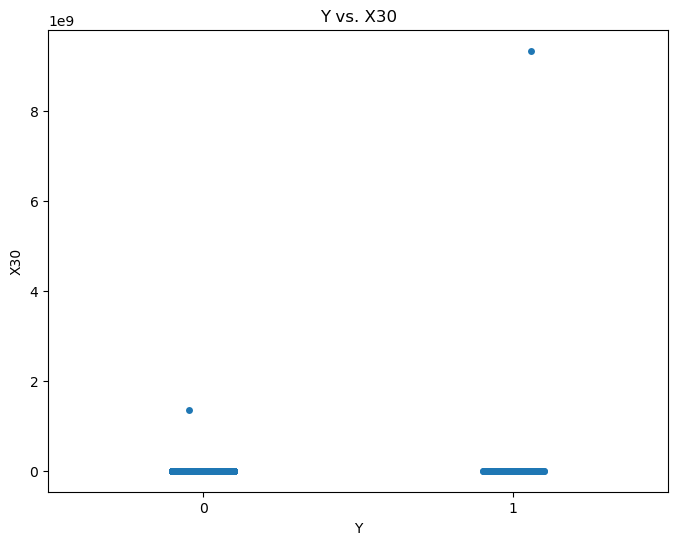

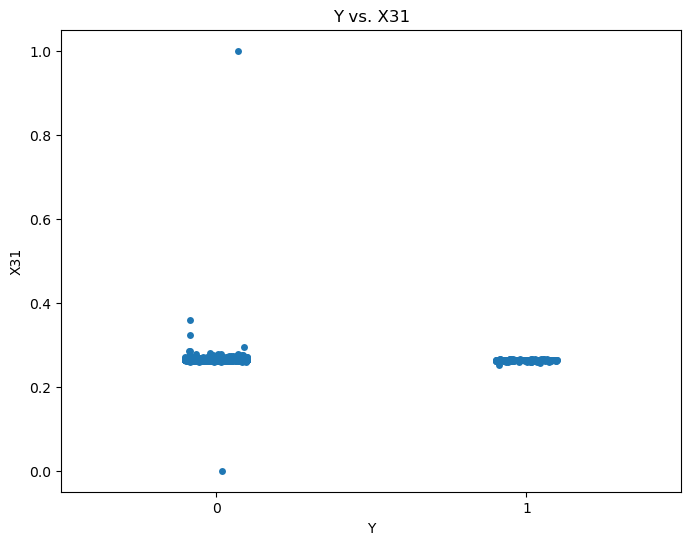

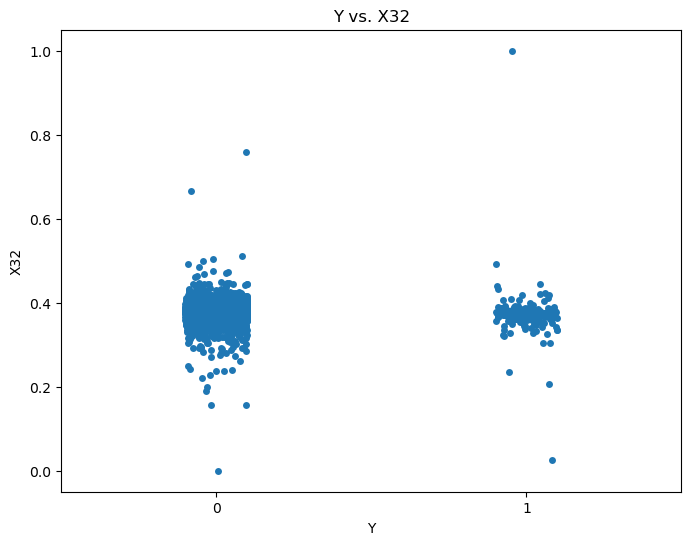

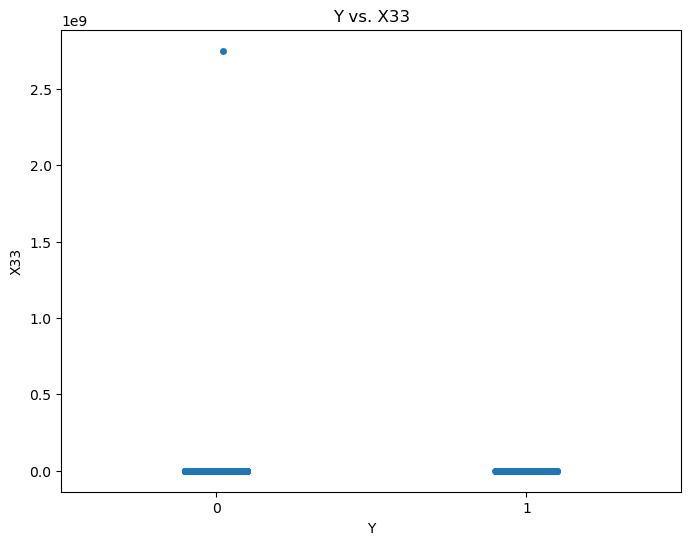

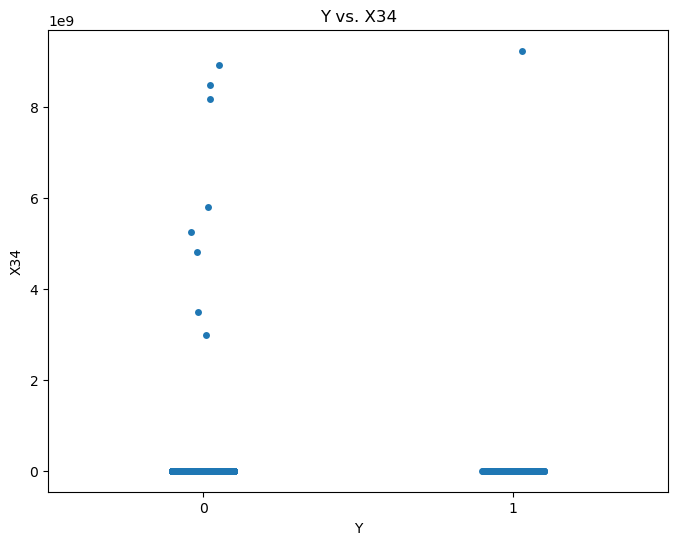

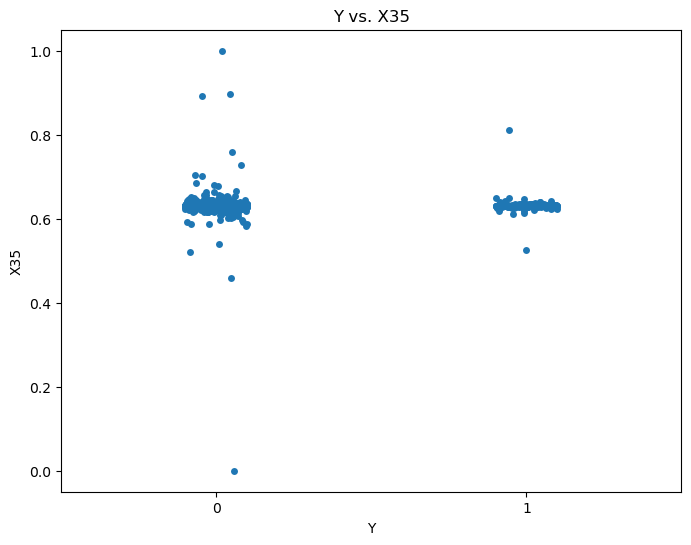

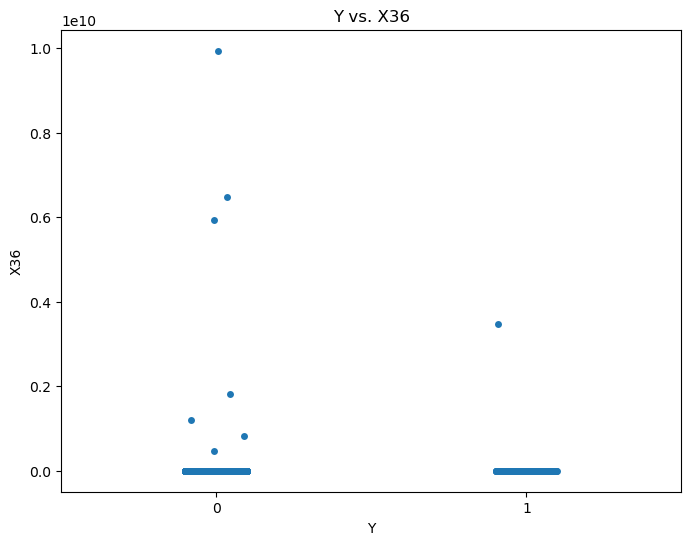

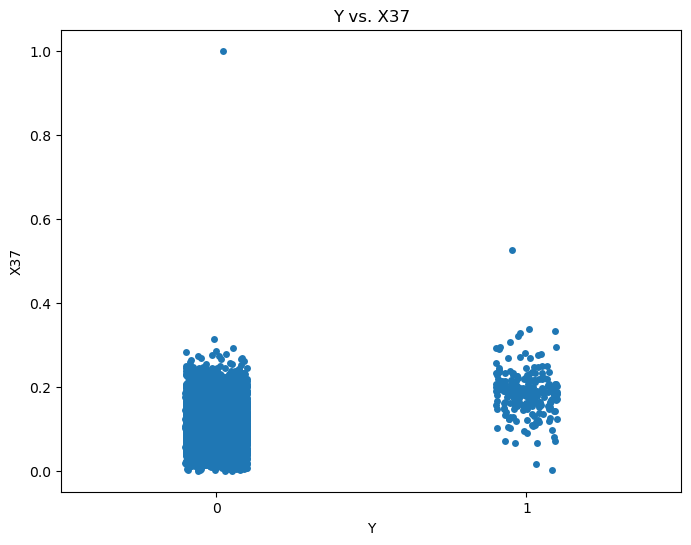

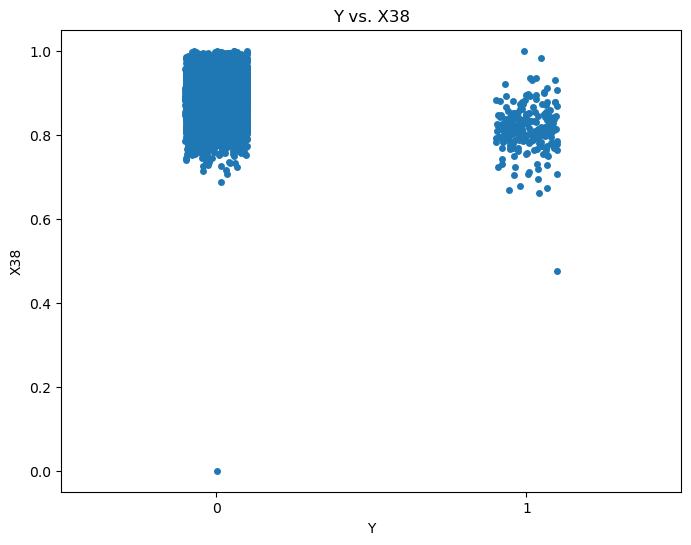

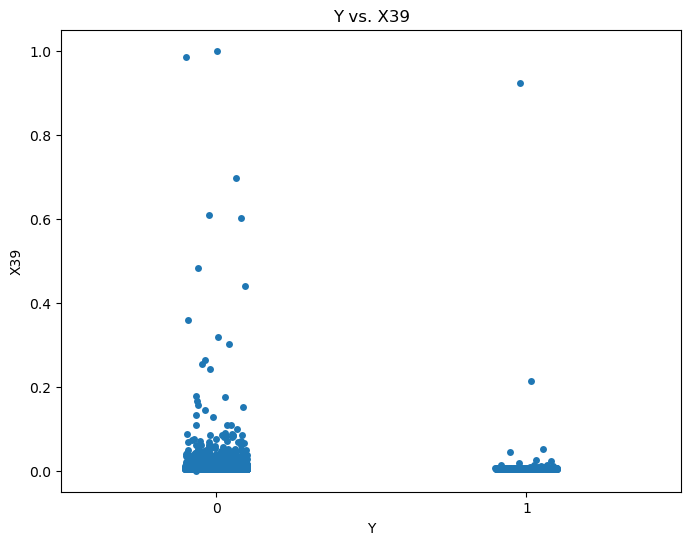

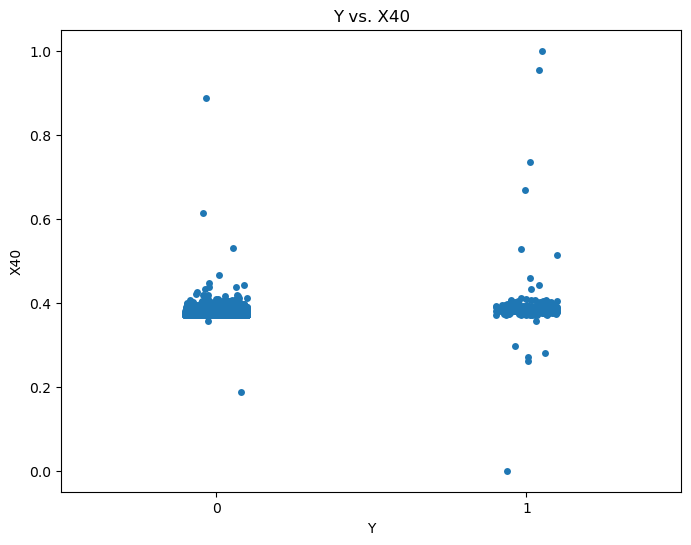

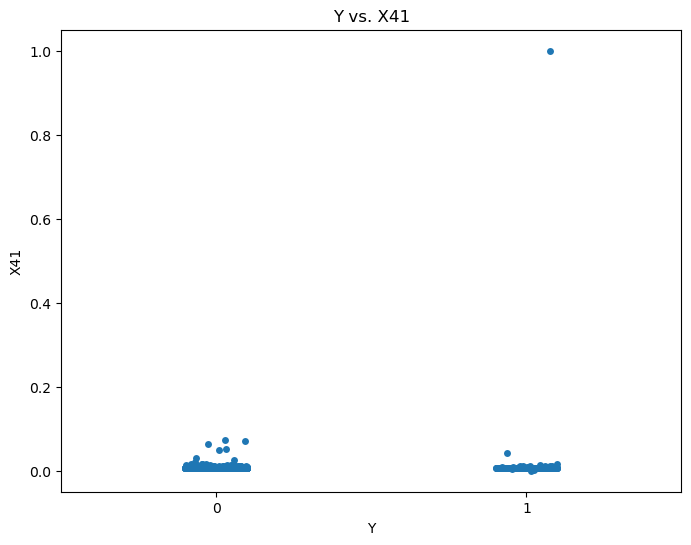

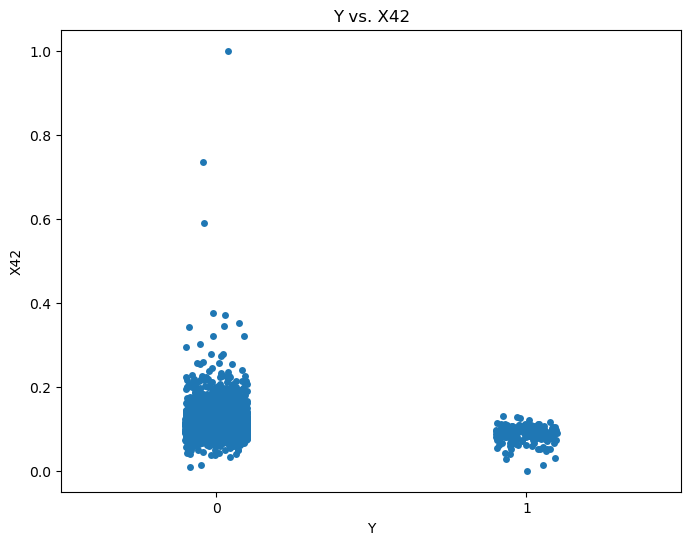

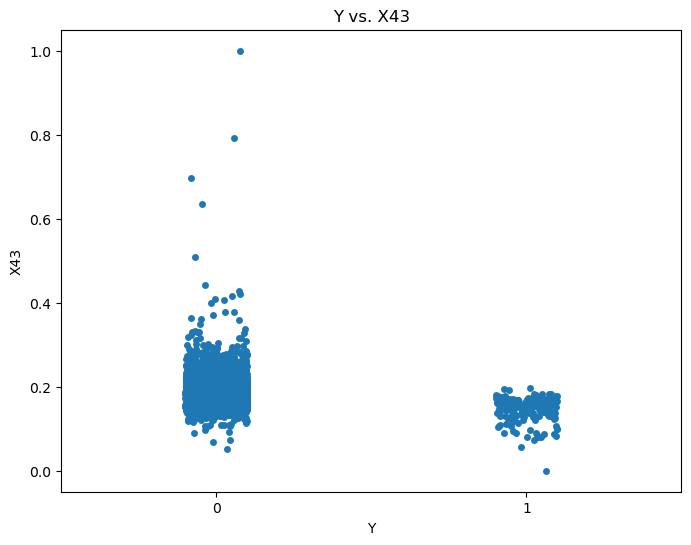

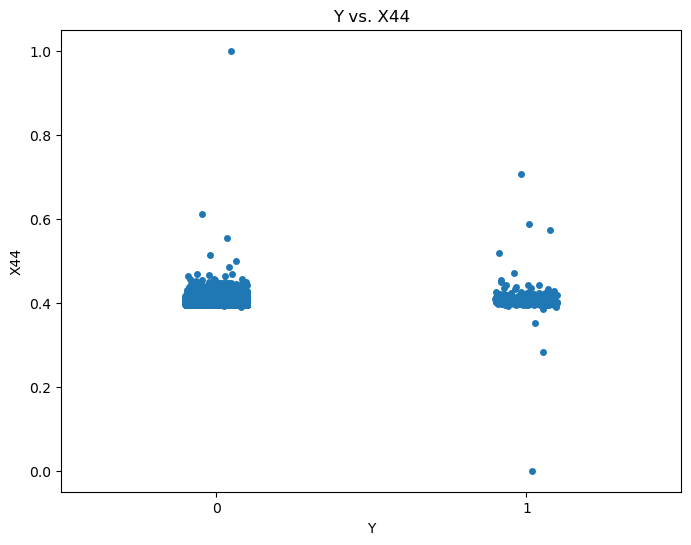

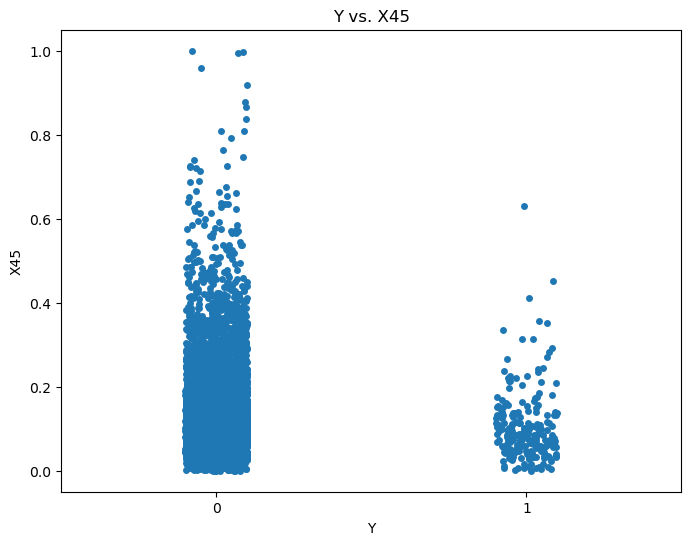

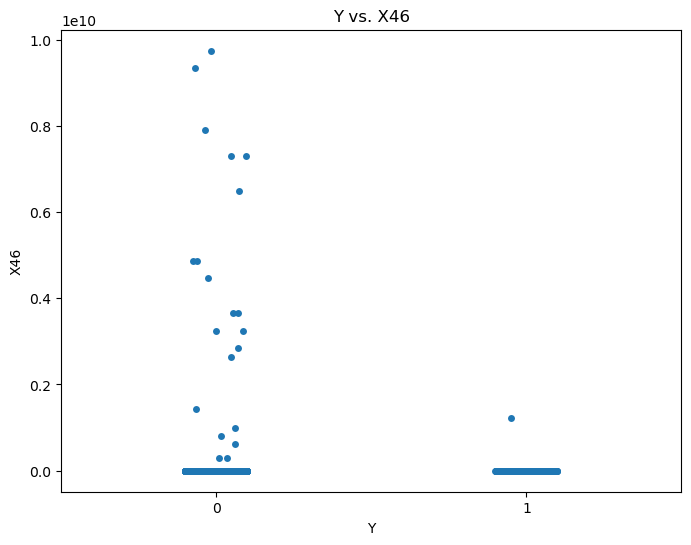

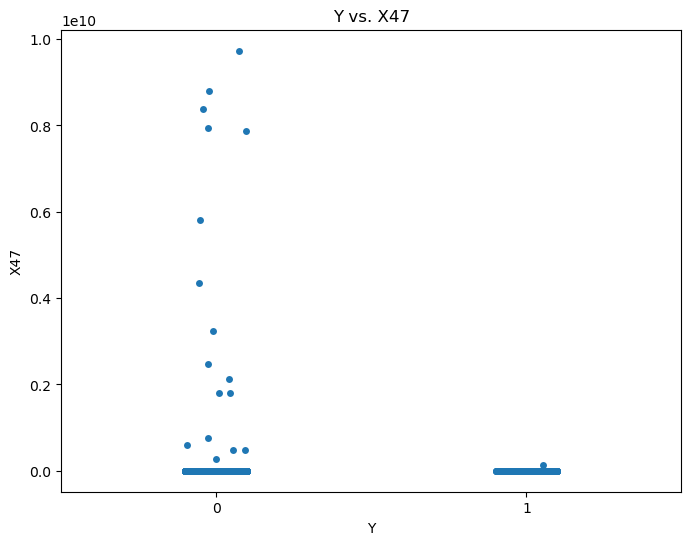

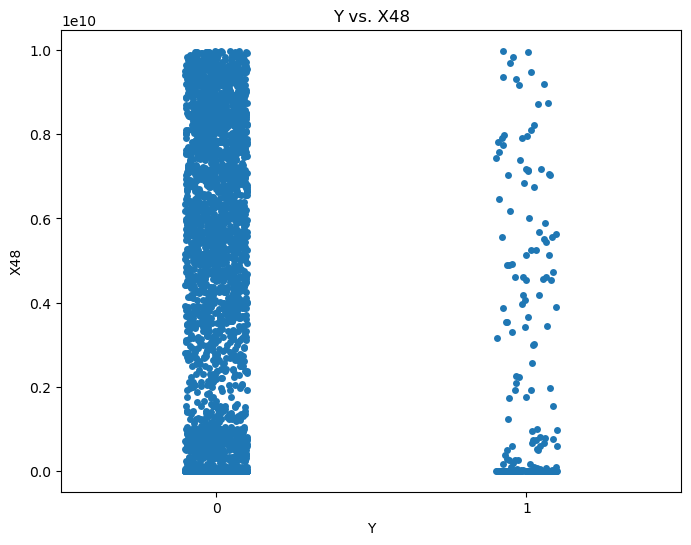

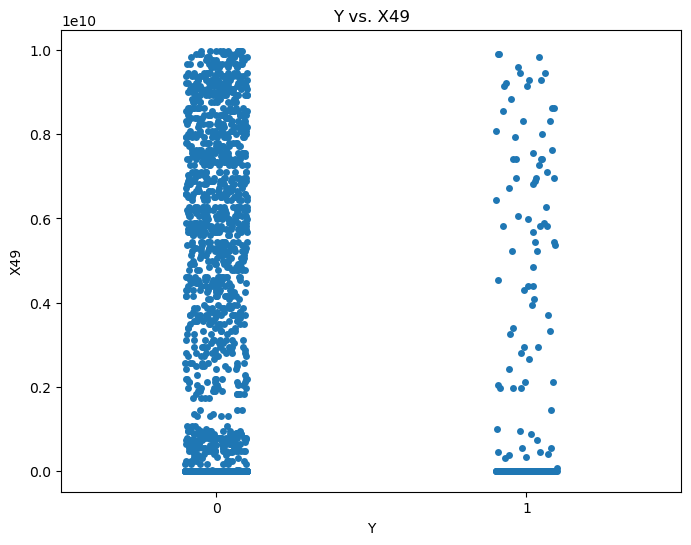

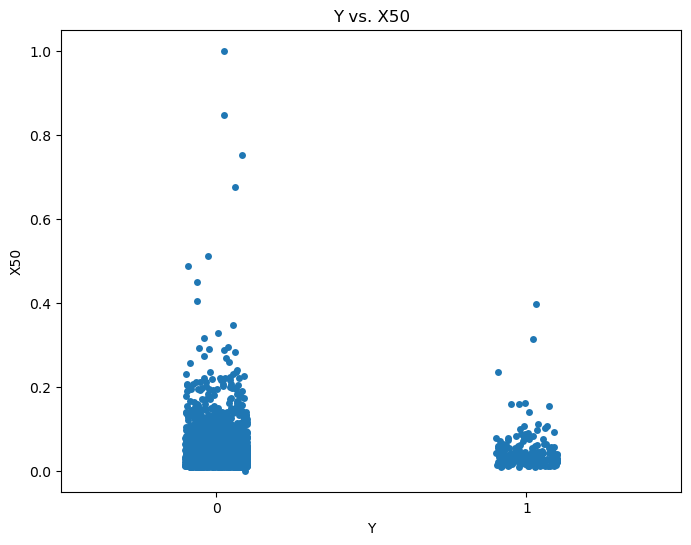

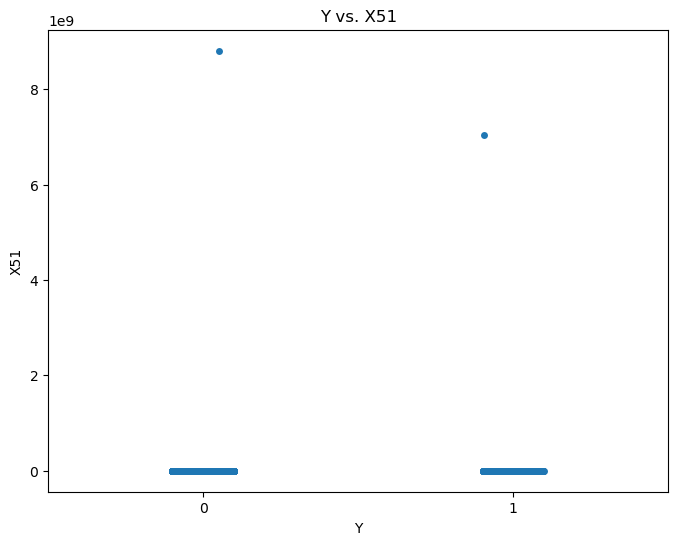

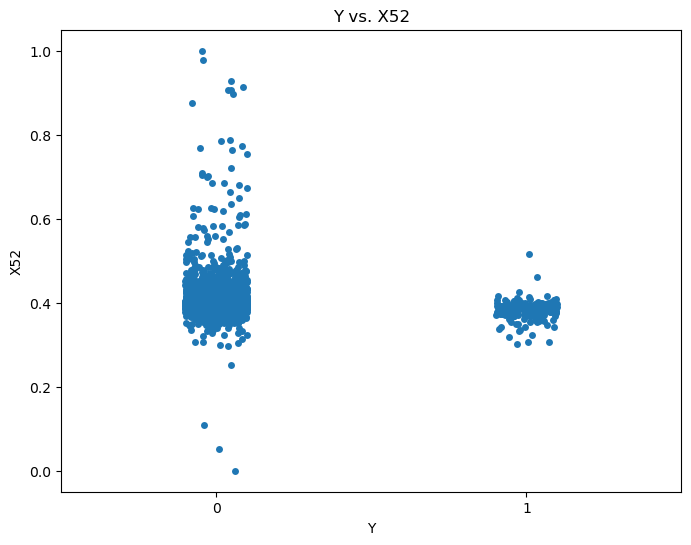

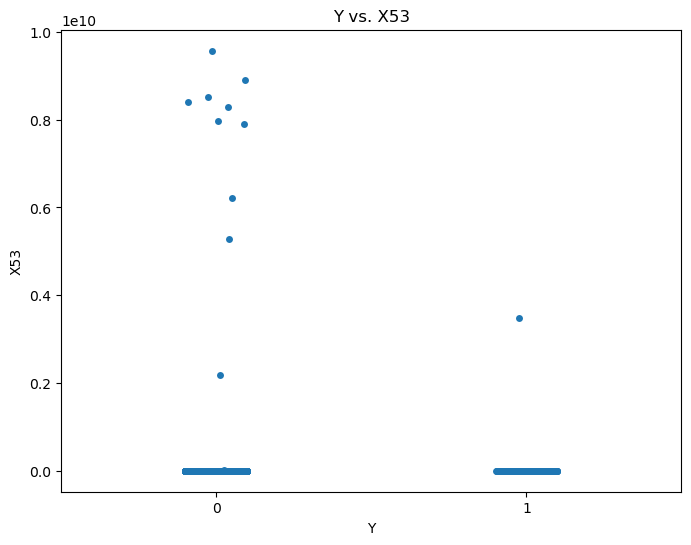

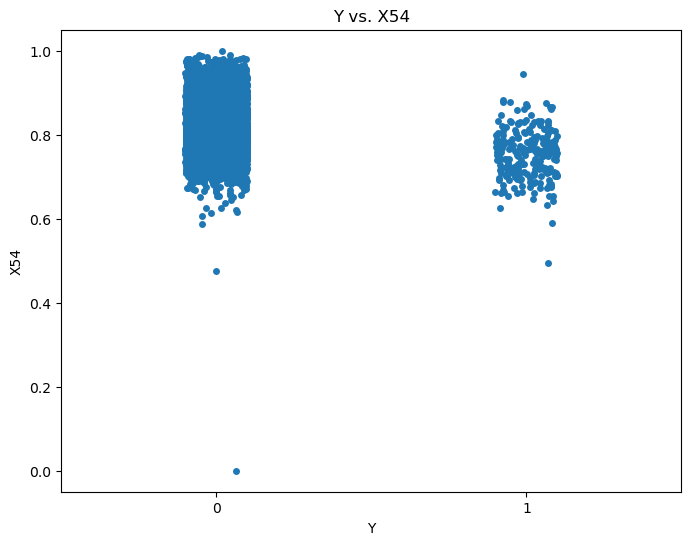

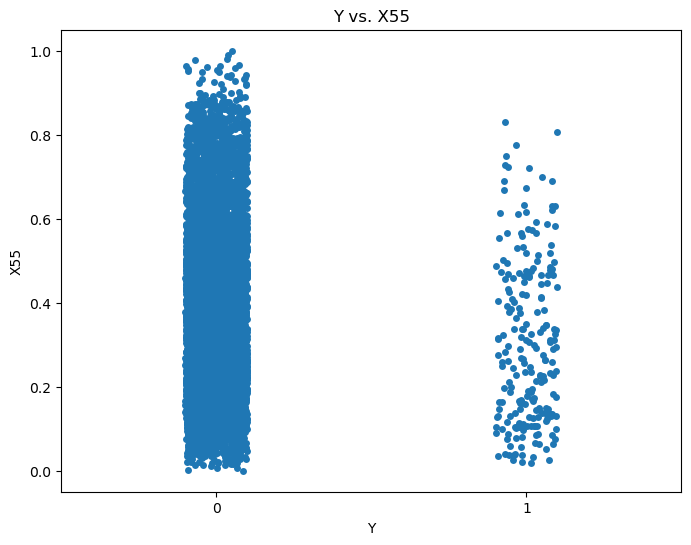

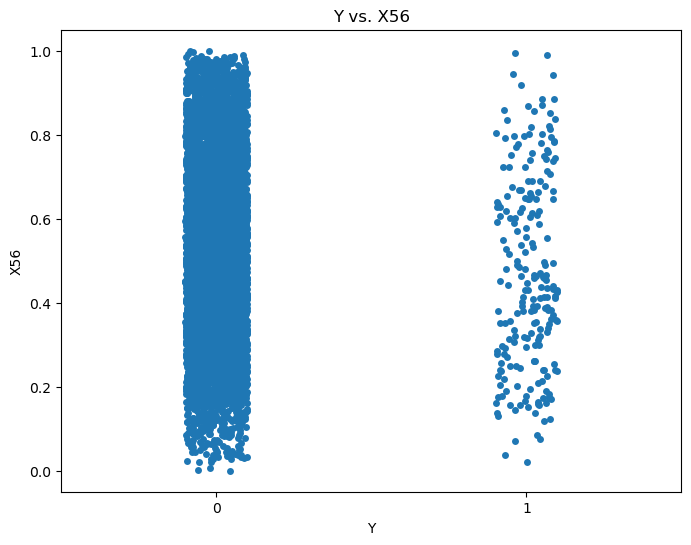

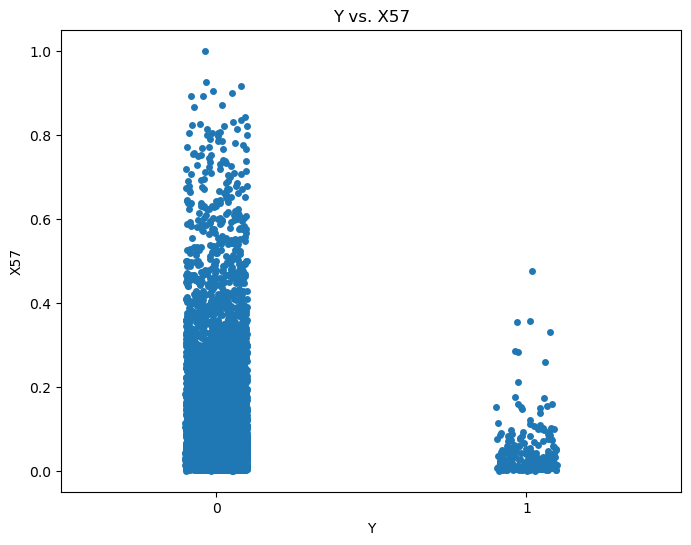

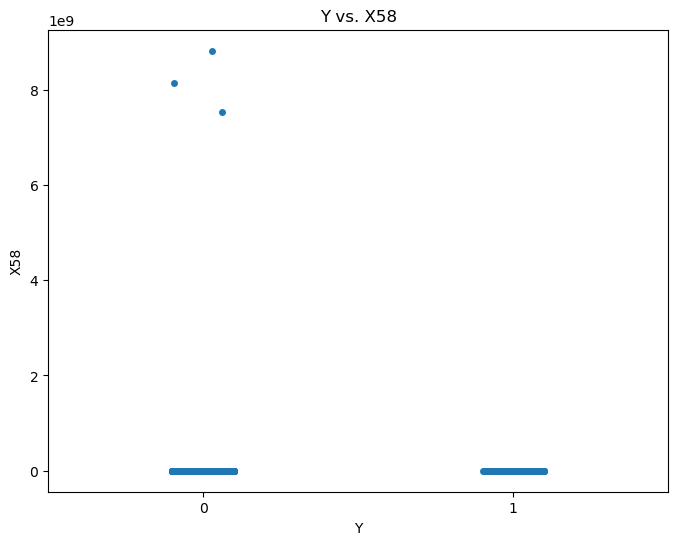

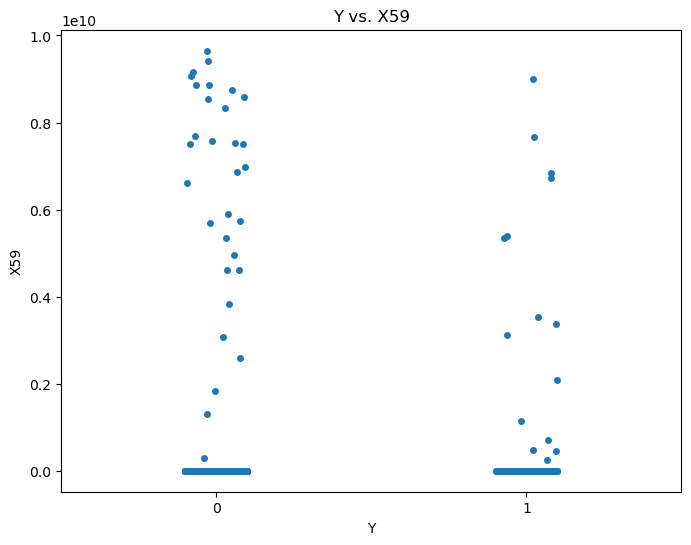

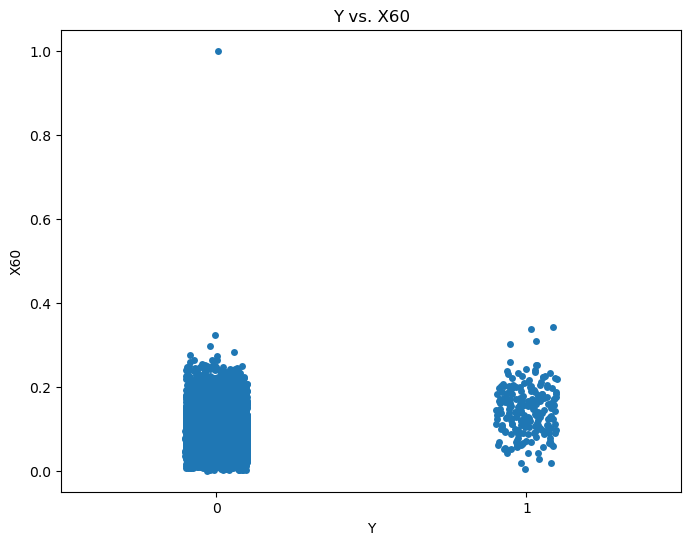

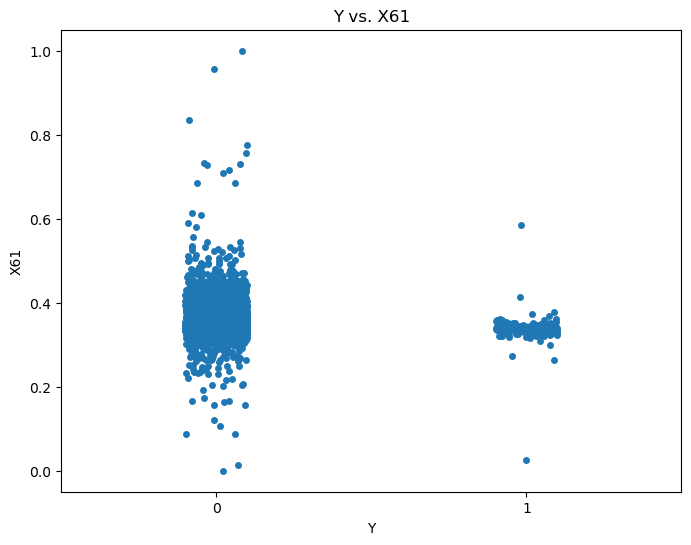

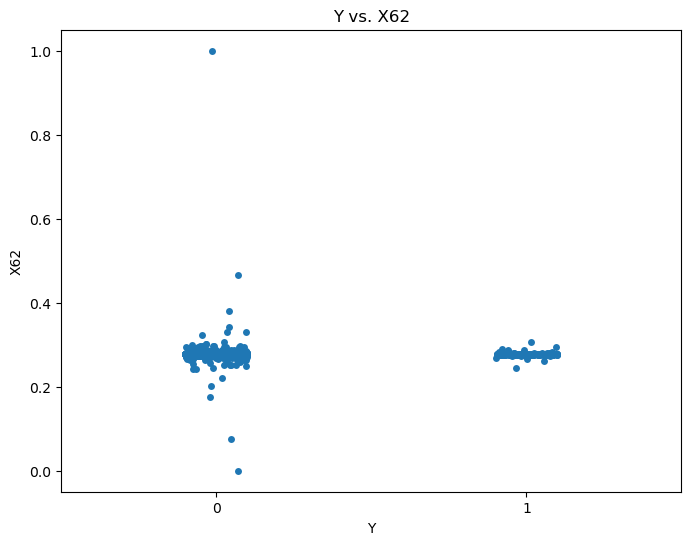

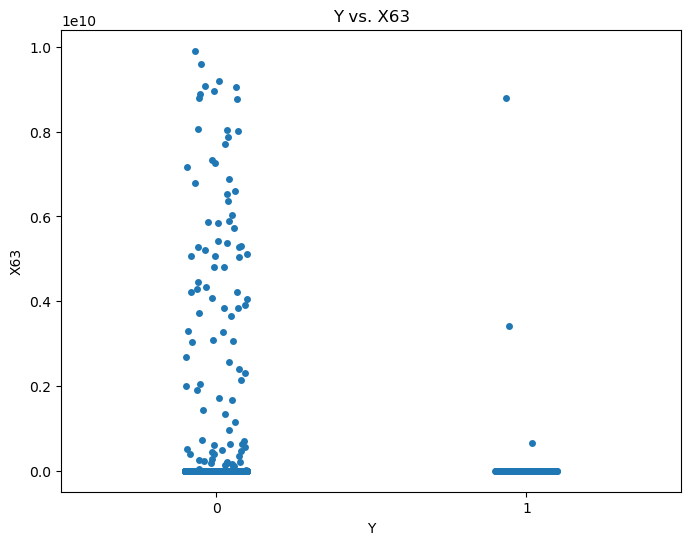

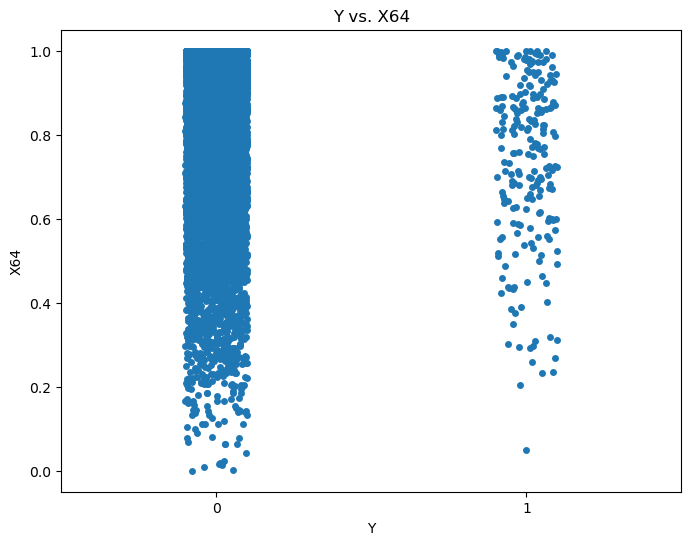

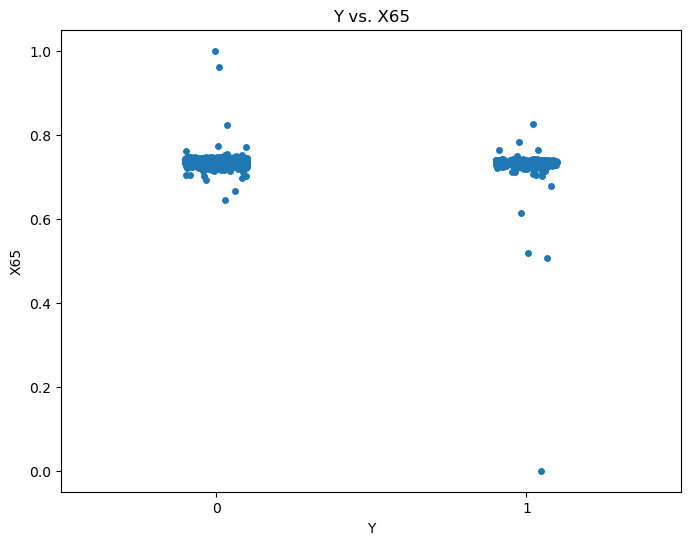

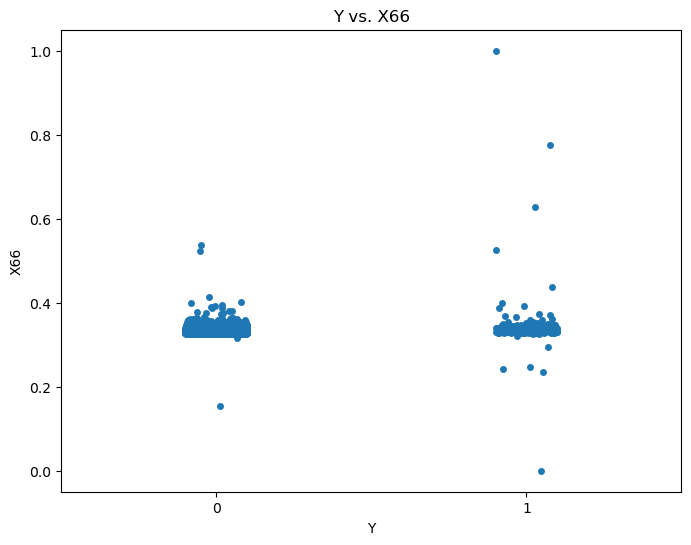

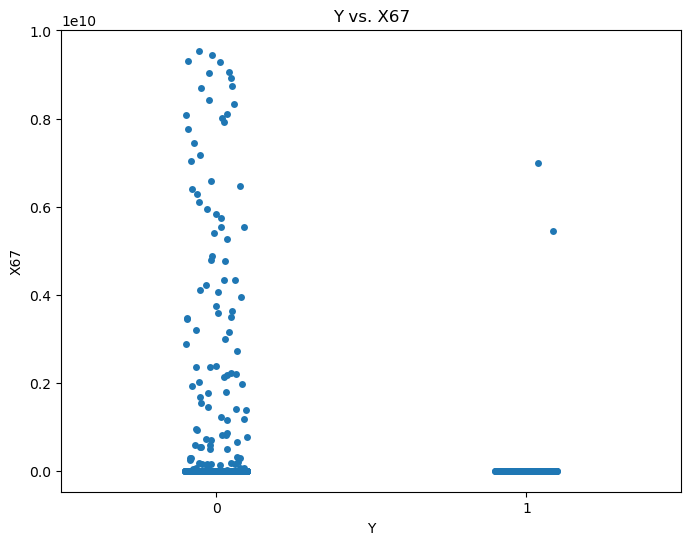

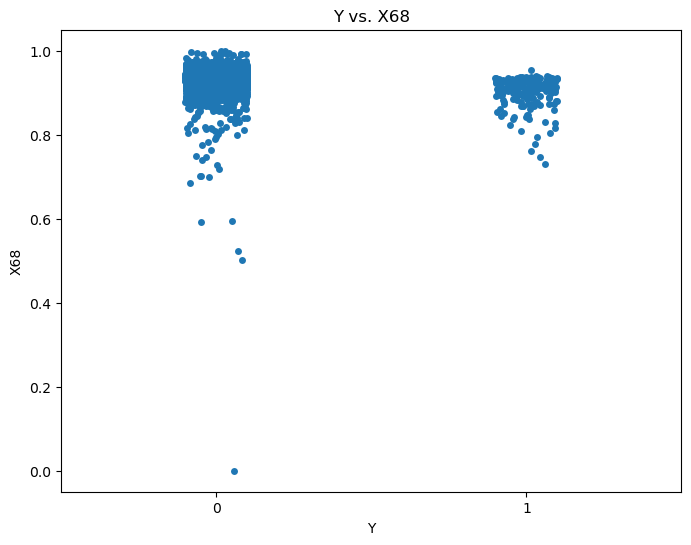

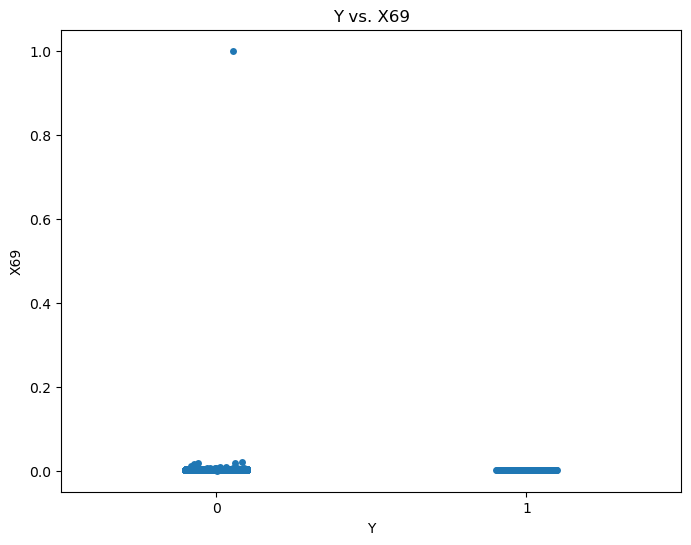

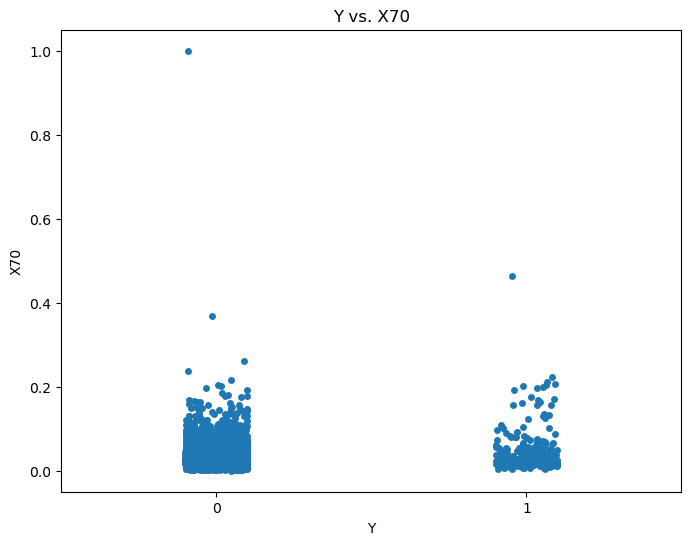

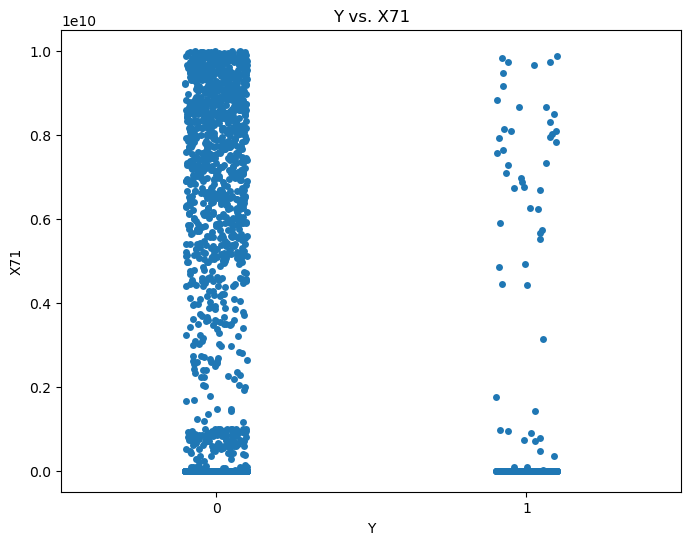

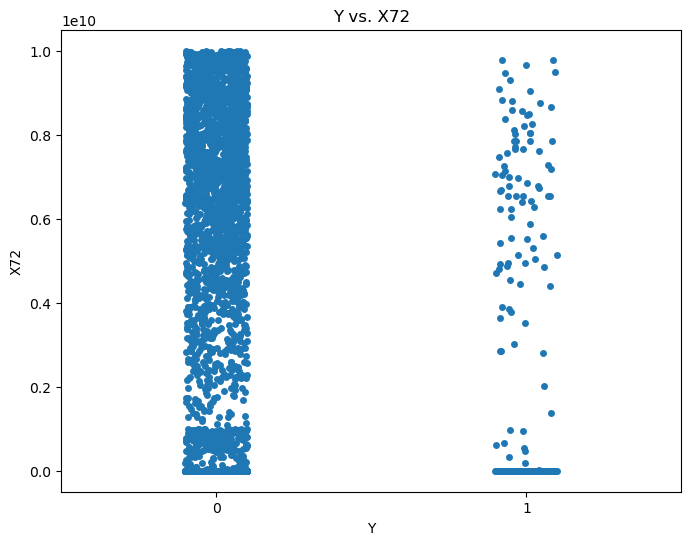

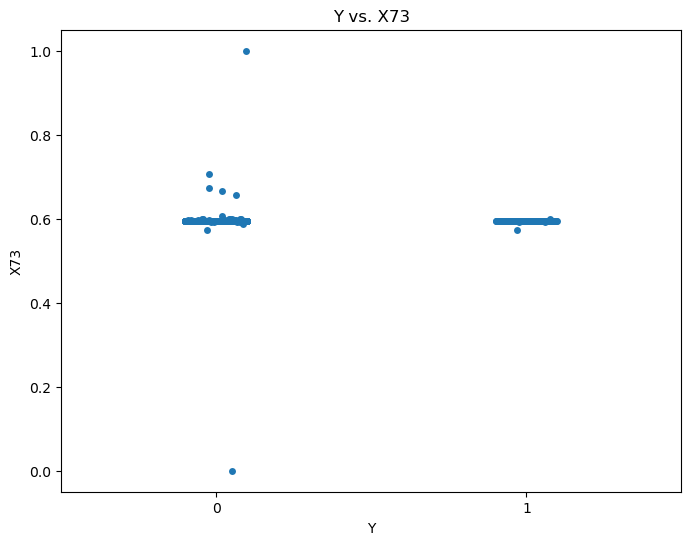

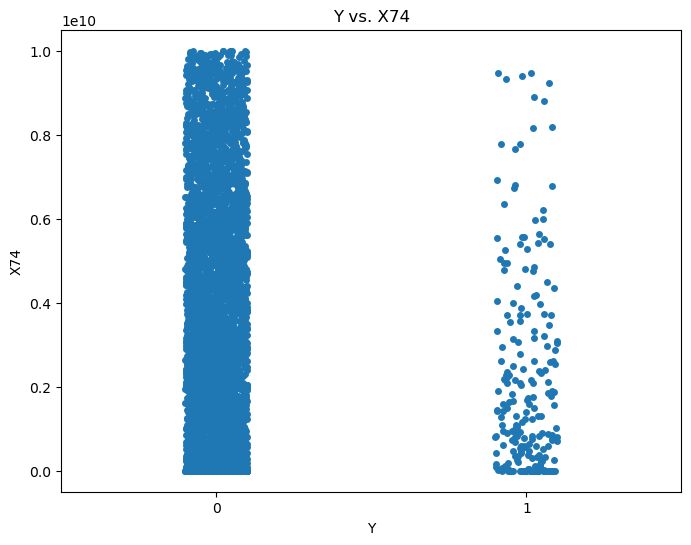

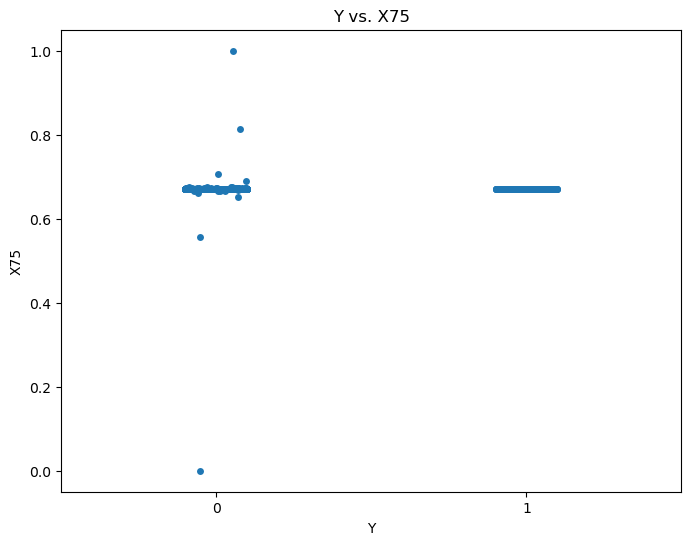

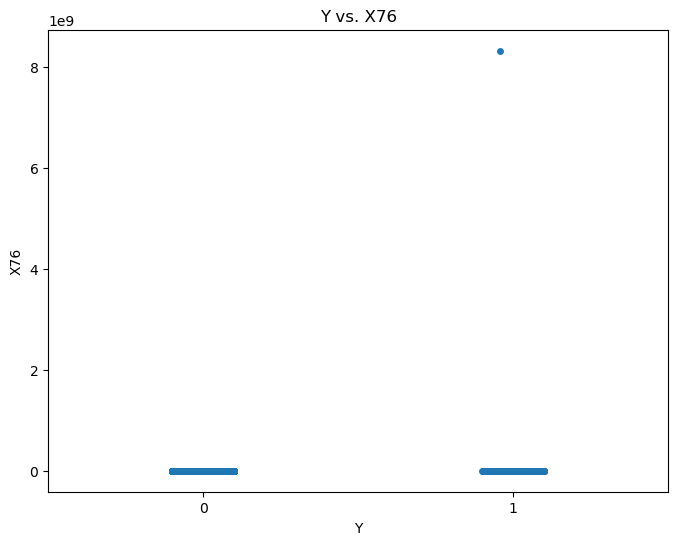

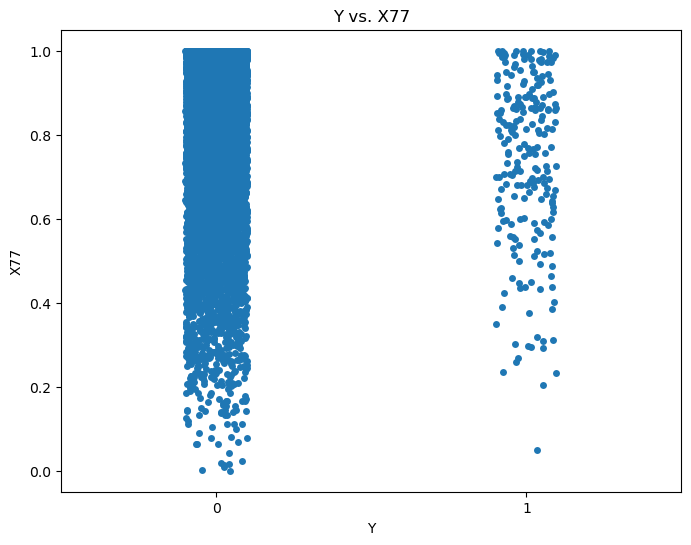

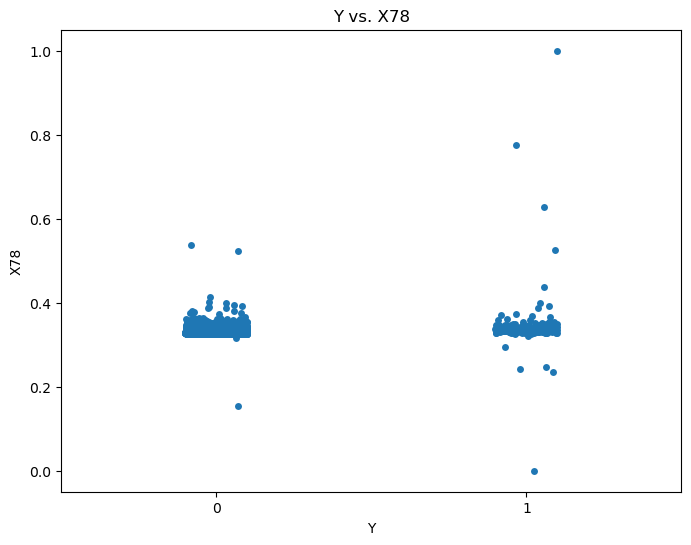

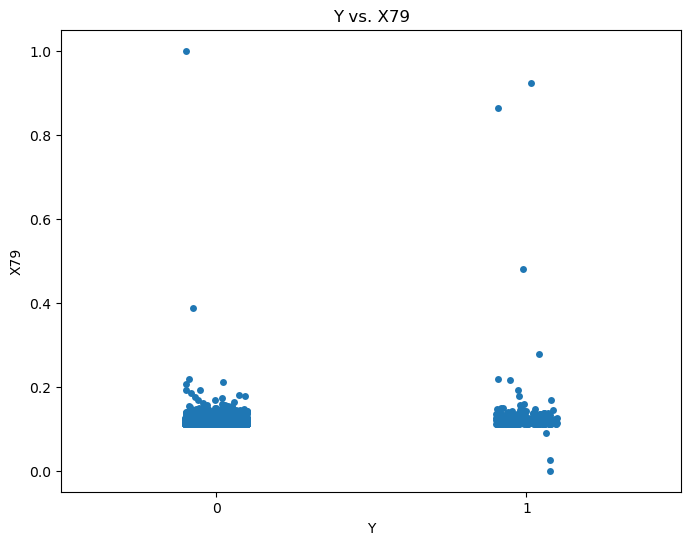

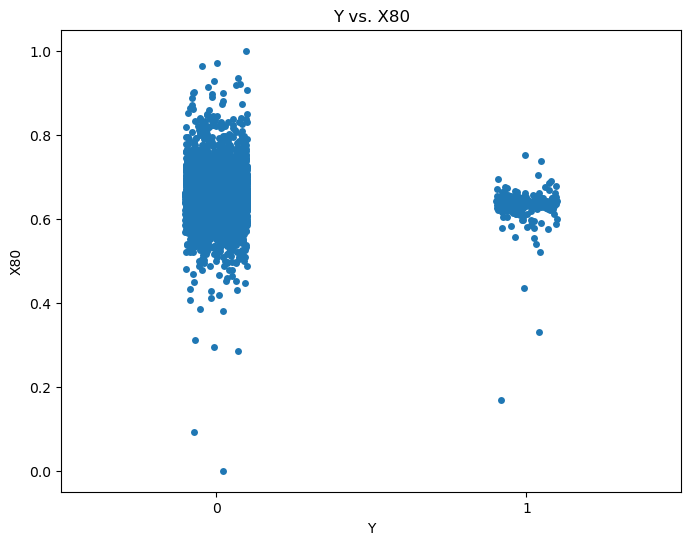

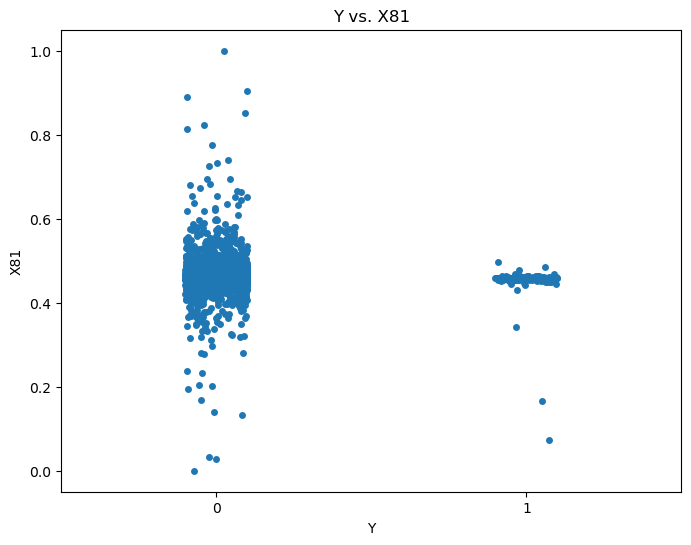

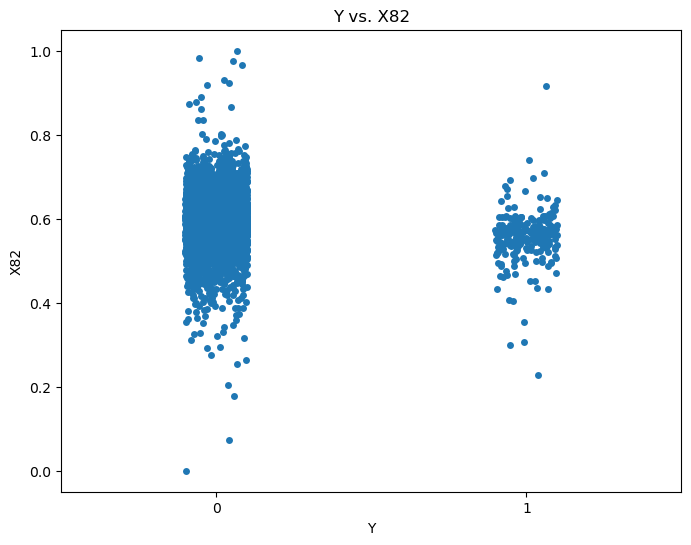

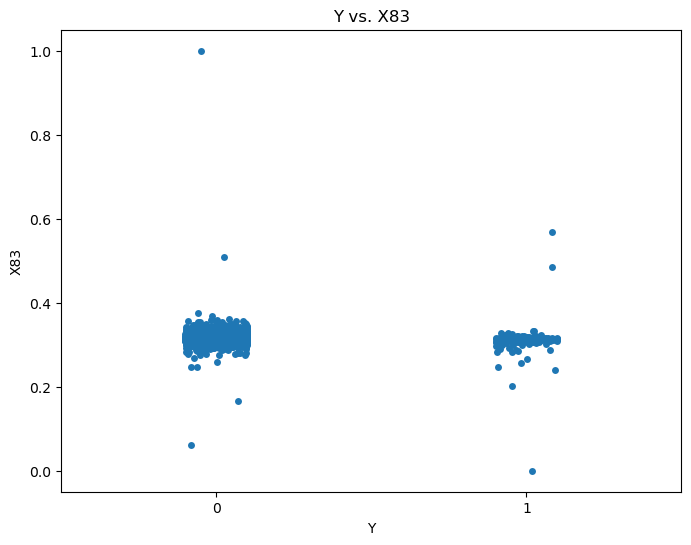

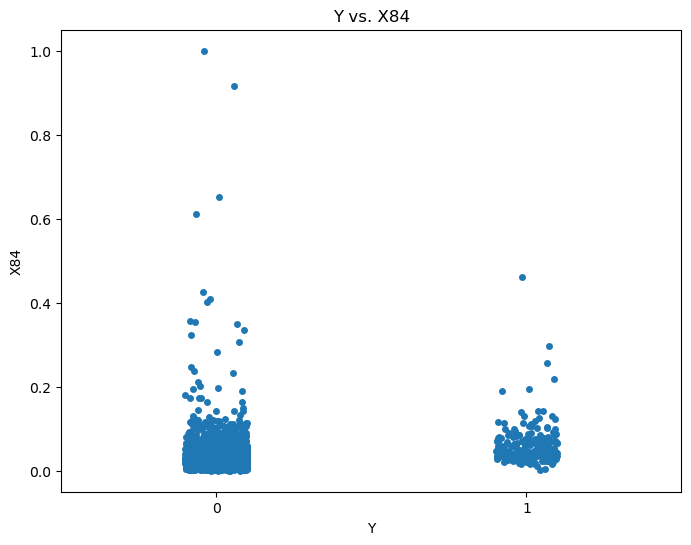

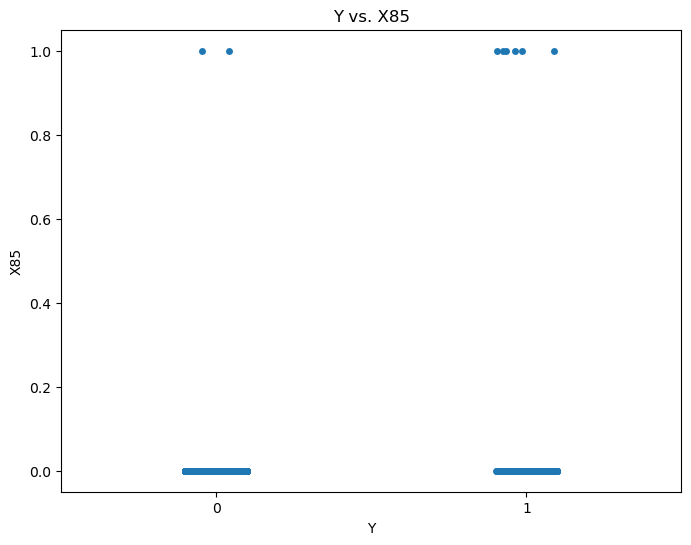

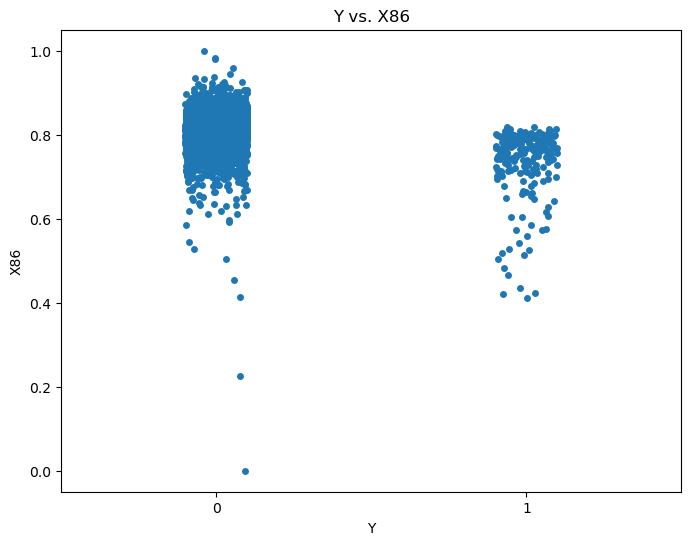

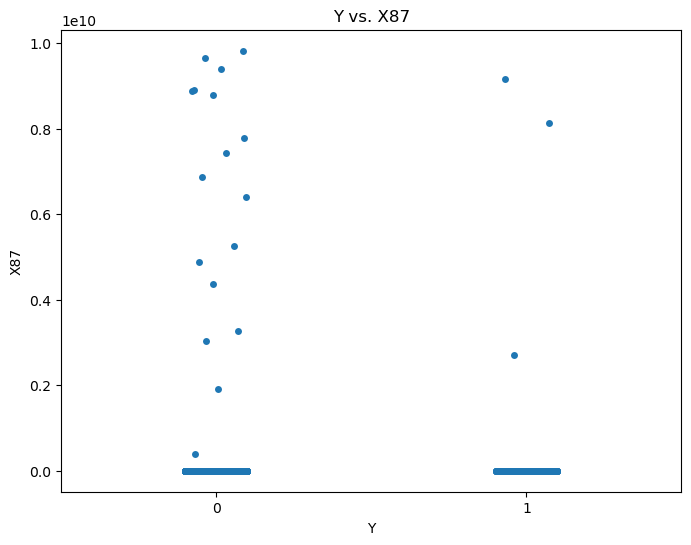

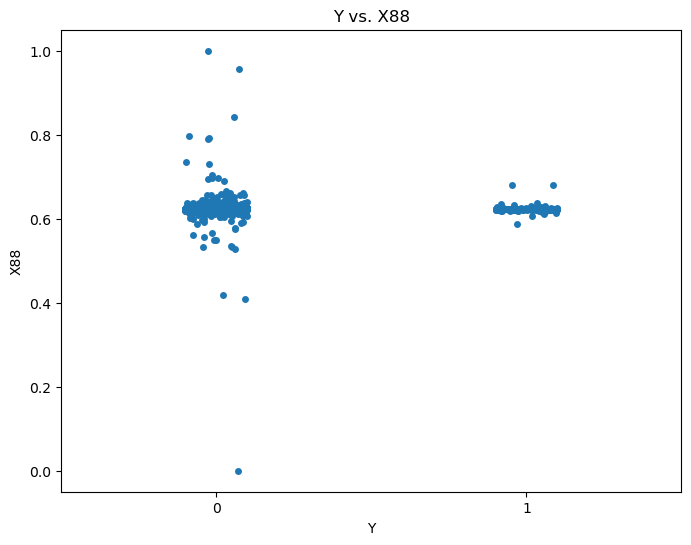

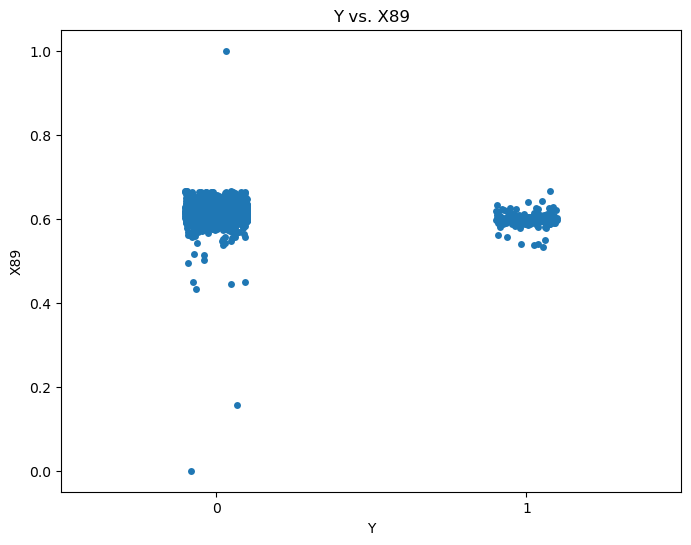

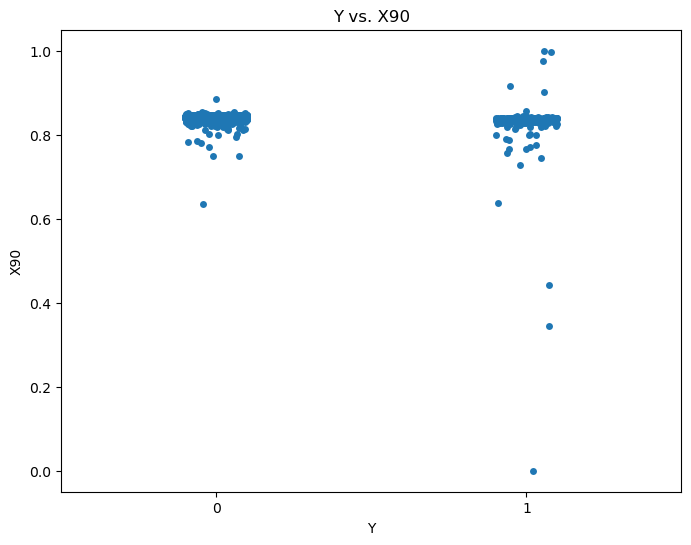

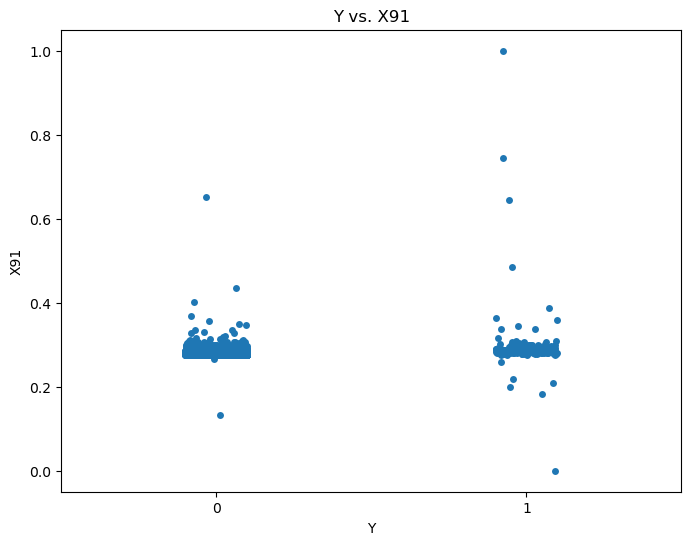

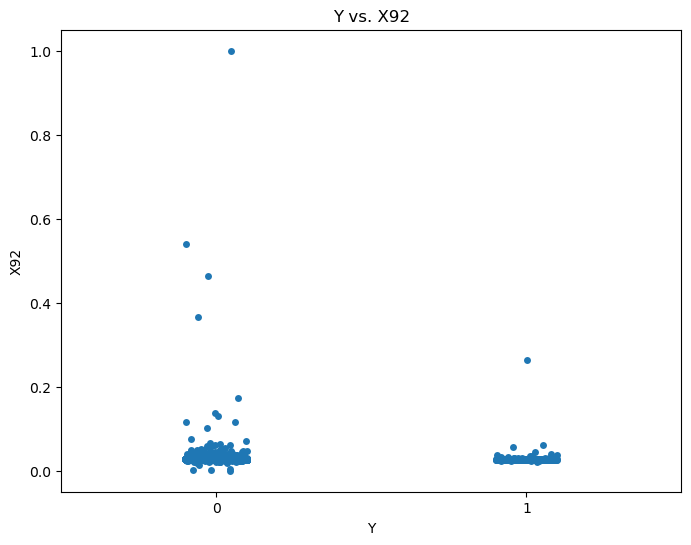

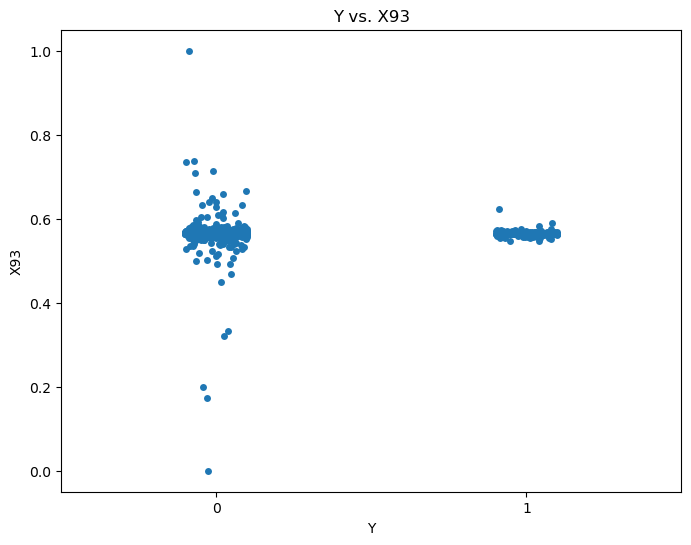

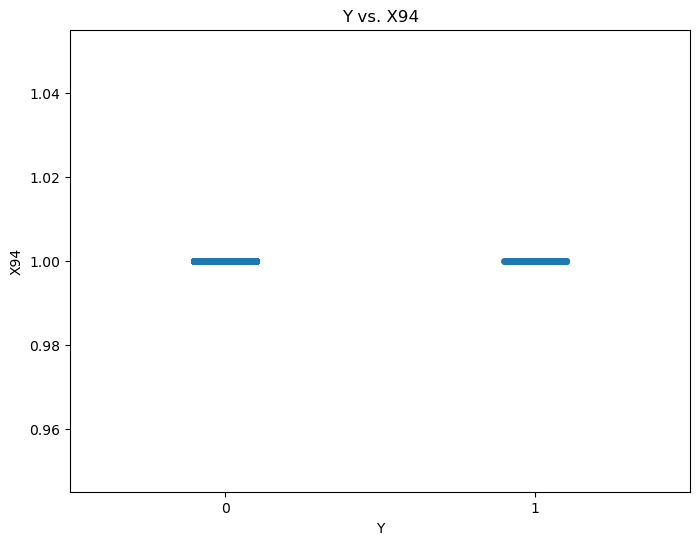

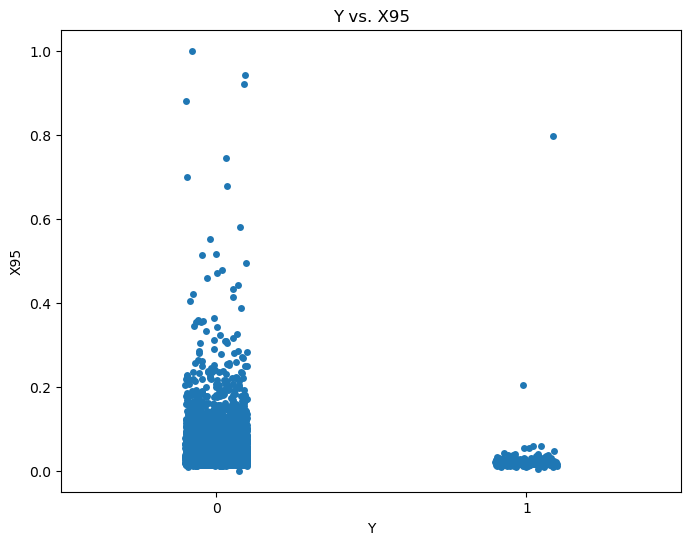

In [21]:
plot_strip_plots(df, 'Y')

###### Result : Lack of Clear Seperation

### Checking Pearson's Test : Relationship of two Continous Variables

In [22]:
# Assume df is your DataFrame
corr_matrix = df.corr()  # Compute the correlation matrix

# Specify the path where you want to save the Excel file
output_file = 'correlation_matrix.xlsx'

# Save the correlation matrix to an Excel file
corr_matrix.to_excel(output_file)

print(f"Correlation matrix has been saved to {output_file}")


Correlation matrix has been saved to correlation_matrix.xlsx


##### Pandas Profilling Report to get a better view of the spread of the data in variables

In [20]:
import pandas_profiling as pp
from IPython.display import IFrame

C:\Users\Aditi\AppData\Local\Temp\ipykernel_9664\855526945.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


##### Panda Profile Report of the Dataset

In [23]:
Bankrupt = pp.ProfileReport(df,minimal=True)
Bankrupt.to_file("bankrupt.html")

C:\Users\Aditi\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Working on Categorical Variables

In [12]:
df.X94.unique()

array([1], dtype=int64)

##### Result: Only ONE UNIQUE value - std = 0 , All Identical values ;

In [13]:
df.Y.unique()

array([1, 0], dtype=int64)

In [14]:
df.X85.unique()

array([0, 1], dtype=int64)

##### Statistical Test to check the Relationship btw Categorical Variables : CHI-SQUARE TEST

In [15]:
from scipy.stats import chi2_contingency

###### Creating the Contigency Table

In [16]:
contingency_table = pd.crosstab(df["Y"], df["X85"])
print(contingency_table)

X85     0  1
Y           
0    6597  2
1     214  6


In [18]:
df.X85.count()

6819

In [19]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Statistic: 110.13807127769104
P-Value: 9.139776609482457e-26
Degrees of Freedom: 1
Expected Frequencies: 
[[6.59125810e+03 7.74189764e+00]
 [2.19741898e+02 2.58102361e-01]]


##### Result: Large Chi-Square Statistic and Lower p-value suggest to reject the NULL Hypothesis, meaning there is an association between the two variables,
###### BUT there is very minute difference in Expected and Observed Frequencies. 
###### FINAL RESULT : Chi-Squared might not be a good test in this case,since the value in Contigency Table <5, which violates the Chi-Square test assumption

### FISHER EXACT TEST

In [27]:
Cont_Table = np.array([[6597, 2],[214, 6]])

In [28]:
Cont_Table

array([[6597,    2],
       [ 214,    6]])

In [24]:
from scipy.stats import fisher_exact

In [29]:
odds_ratio, p_value = fisher_exact(Cont_Table, alternative='two-sided')

print(f"Odds Ratio: {odds_ratio}")
print(f"P-Value: {p_value}")

Odds Ratio: 92.48130841121495
P-Value: 2.797462241972515e-08


##### Result: Since Odd Ratio > 1 (Very Large) and p-value is lower than significance level of even 0.01, this represent that Null Hypothesis can definately be rejected and yes there is a positive association between two variables

## EDA

##### 5 point Summary

In [10]:
Desc = df.describe()  
output_file = 'Describe.xlsx'
Desc.to_excel(output_file)
print(f"Describe() results has been saved to {output_file}")

Describe() results has been saved to Describe.xlsx


###### 1. Checking for missing values

In [32]:
Null_Check = df.isna().sum()  
output_file = 'Null_Check.xlsx'
Null_Check.to_excel(output_file)
print(f"Null() results has been saved to {output_file}")

Describe() results has been saved to Null_Check.xlsx


##### Result : No Missing Value

###### 2. Outlier Check

###### Checking Outliers in All COntinous Variables

In [33]:
df3 = df.copy()

In [34]:
df_target = df.Y

In [35]:
df_target

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Y, Length: 6819, dtype: int64

In [38]:
df_cat = df.loc[:,['Y','X85']]

In [40]:
help(df3.drop)

Help on method drop in module pandas.core.frame:

drop(labels: 'IndexLabel' = None, *, axis: 'Axis' = 0, index: 'IndexLabel' = None, columns: 'IndexLabel' = None, level: 'Level' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the `user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index

In [42]:
df3.drop(['Y','X85','X94'],axis=1,inplace=True)

In [43]:
df3

X1        X2        X3        X4        X5        X6        X7  \
0     0.370594  0.424389  0.405750  0.601457  0.601457  0.998969  0.796887   
1     0.464291  0.538214  0.516730  0.610235  0.610235  0.998946  0.797380   
2     0.426071  0.499019  0.472295  0.601450  0.601364  0.998857  0.796403   
3     0.399844  0.451265  0.457733  0.583541  0.583541  0.998700  0.796967   
4     0.465022  0.538432  0.522298  0.598783  0.598783  0.998973  0.797366   
...        ...       ...       ...       ...       ...       ...       ...   
6814  0.493687  0.539468  0.543230  0.604455  0.604462  0.998992  0.797409   
6815  0.475162  0.538269  0.524172  0.598308  0.598308  0.998992  0.797414   
6816  0.472725  0.533744  0.520638  0.610444  0.610213  0.998984  0.797401   
6817  0.506264  0.559911  0.554045  0.607850  0.607850  0.999074  0.797500   
6818  0.493053  0.570105  0.549548  0.627409  0.627409  0.998080  0.801987   

            X8        X9       X10  ...       X84       X86       X87  \
0     0.808809  0.302646  0.780985  ...  0.118250  0.716845  0.009219   
1     0.809301  0.303556  0.781506  ...  0.047775  0.795297  0.008323   
2     0.808388  0.302035  0.780284  ...  0.025346  0.774670  0.040003   
3     0.808966  0.303350  0.781241  ...  0.067250  0.739555  0.003252   
4     0.809304  0.303475  0.781550  ...  0.047725  0.795016  0.003878   
...        ...       ...       ...  ...       ...       ...       ...   
6814  0.809331  0.303510  0.781588  ...  0.027951  0.799927  0.000466   
6815  0.809327  0.303520  0.781586  ...  0.031470  0.799748  0.001959   
6816  0.809317  0.303512  0.781546  ...  0.007542  0.797778  0.002840   
6817  0.809399  0.303498  0.781663  ...  0.022916  0.811808  0.002837   
6818  0.813800  0.313415  0.786079  ...  0.005579  0.815956  0.000707   

           X88       X89       X90       X91       X92       X93       X95  
0     0.622879  0.601453  0.827890  0.290202  0.026601  0.564050  0.016469  
1     0.623652  0.610237  0.839969  0.283846  0.264577  0.570175  0.020794  
2     0.623841  0.601449  0.836774  0.290189  0.026555  0.563706  0.016474  
3     0.622929  0.583538  0.834697  0.281721  0.026697  0.564663  0.023982  
4     0.623521  0.598782  0.839973  0.278514  0.024752  0.575617  0.035490  
...        ...       ...       ...       ...       ...       ...       ...  
6814  0.623620  0.604455  0.840359  0.279606  0.027064  0.566193  0.029890  
6815  0.623931  0.598306  0.840306  0.278132  0.027009  0.566018  0.038284  
6816  0.624156  0.610441  0.840138  0.275789  0.026791  0.565158  0.097649  
6817  0.623957  0.607846  0.841084  0.277547  0.026822  0.565302  0.044009  
6818  0.626680  0.627408  0.841019  0.275114  0.026793  0.565167  0.233902  

[6819 rows x 93 columns]

In [44]:
def detect_outliers(df, threshold=3):
    outlier_matrix = pd.DataFrame(False, index=df.index, columns=df.columns)
    for col in df.select_dtypes(include=[np.number]):  # Numeric columns only
        mean = df[col].mean()
        std = df[col].std()
        z_scores = (df[col] - mean) / std
        outlier_matrix[col] = abs(z_scores) > threshold
    return outlier_matrix

In [48]:
outliers = detect_outliers(df3)
output_file = 'Outlier_Check.xlsx'
outliers.to_excel(output_file)
print(f"Outliers results has been saved to {output_file}")

Outliers results has been saved to Outlier_Check.xlsx


<Axes: >

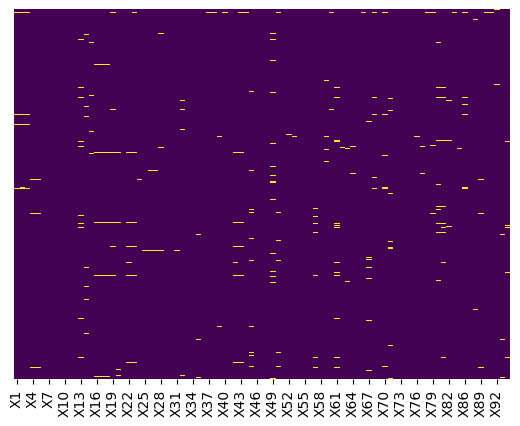

In [50]:
sns.heatmap(outliers, cmap="viridis", cbar=False, yticklabels=False)

#### Result : There are Outliers in most of the Columns

###### 1. Checking the Split of the data in Dependent Variable

Class Split
0    6599
1     220
Name: Y, dtype: int64


Text(0, 0.5, 'Count')

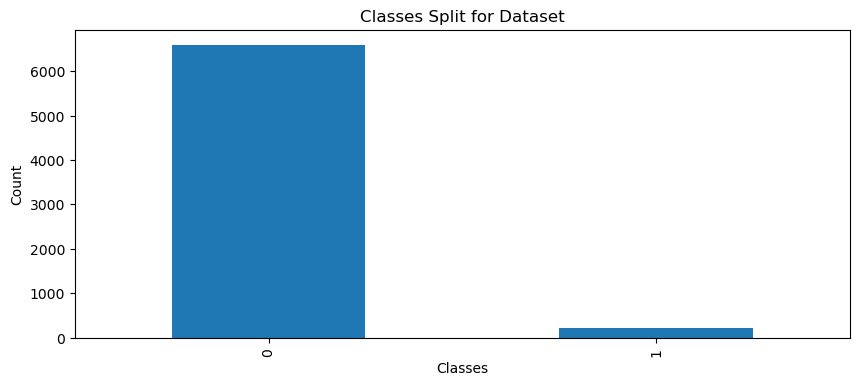

In [52]:
print('Class Split')
print(df['Y'].value_counts())
df['Y'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

#### To balance the dataset, Seperating Categories of Target Variable (Y)

In [58]:
df_target

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Y, Length: 6819, dtype: int64

In [59]:
df_bankrupt = df[df.Y == 1]

In [61]:
df_bankrupt.reset_index(inplace=True)

In [63]:
df_bankrupt.drop(columns=['index'],inplace=True)

C:\Users\Aditi\AppData\Local\Temp\ipykernel_19368\2848303951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bankrupt.drop(columns=['index'],inplace=True)


In [64]:
df_bankrupt

Y        X1        X2        X3        X4        X5        X6        X7  \
0    1  0.370594  0.424389  0.405750  0.601457  0.601457  0.998969  0.796887   
1    1  0.464291  0.538214  0.516730  0.610235  0.610235  0.998946  0.797380   
2    1  0.426071  0.499019  0.472295  0.601450  0.601364  0.998857  0.796403   
3    1  0.399844  0.451265  0.457733  0.583541  0.583541  0.998700  0.796967   
4    1  0.465022  0.538432  0.522298  0.598783  0.598783  0.998973  0.797366   
..  ..       ...       ...       ...       ...       ...       ...       ...   
215  1  0.418515  0.433984  0.461427  0.612750  0.612750  0.998864  0.796902   
216  1  0.196802  0.211023  0.221425  0.598056  0.598056  0.998933  0.796144   
217  1  0.337640  0.254307  0.378446  0.590842  0.590842  0.998869  0.796943   
218  1  0.340028  0.344636  0.380213  0.581466  0.581466  0.998372  0.796292   
219  1  0.492176  0.544320  0.533326  0.618105  0.618105  0.999083  0.797456   

           X8        X9  ...       X86       X87       X88       X89  \
0    0.808809  0.302646  ...  0.716845  0.009219  0.622879  0.601453   
1    0.809301  0.303556  ...  0.795297  0.008323  0.623652  0.610237   
2    0.808388  0.302035  ...  0.774670  0.040003  0.623841  0.601449   
3    0.808966  0.303350  ...  0.739555  0.003252  0.622929  0.583538   
4    0.809304  0.303475  ...  0.795016  0.003878  0.623521  0.598782   
..        ...       ...  ...       ...       ...       ...       ...   
215  0.808857  0.302892  ...  0.725750  0.000487  0.623730  0.612747   
216  0.808149  0.301423  ...  0.519388  0.017588  0.623465  0.598051   
217  0.808897  0.302953  ...  0.557733  0.000847  0.623302  0.590838   
218  0.808283  0.302857  ...  0.641804  0.000376  0.623497  0.581461   
219  0.809338  0.303401  ...  0.800780  0.000517  0.623737  0.618104   

          X90       X91       X92       X93  X94       X95  
0    0.827890  0.290202  0.026601  0.564050    1  0.016469  
1    0.839969  0.283846  0.264577  0.570175    1  0.020794  
2    0.836774  0.290189  0.026555  0.563706    1  0.016474  
3    0.834697  0.281721  0.026697  0.564663    1  0.023982  
4    0.839973  0.278514  0.024752  0.575617    1  0.035490  
..        ...       ...       ...       ...  ...       ...  
215  0.828067  0.292648  0.026666  0.564481    1  0.015620  
216  0.856906  0.259280  0.026769  0.565052    1  0.003946  
217  0.726888  0.336515  0.026777  0.565092    1  0.011797  
218  0.765967  0.337315  0.026722  0.564807    1  0.011777  
219  0.840533  0.282763  0.027033  0.566098    1  0.022209  

[220 rows x 96 columns]

In [65]:
df_safe = df[df.Y == 0]

In [68]:
df_safe.reset_index(drop=True,inplace=True)

In [69]:
df_safe

Y        X1        X2        X3        X4        X5        X6        X7  \
0     0  0.390923  0.445704  0.436158  0.619950  0.619950  0.998993  0.797012   
1     0  0.508361  0.570922  0.559077  0.601738  0.601717  0.999009  0.797449   
2     0  0.488519  0.545137  0.543284  0.603612  0.603612  0.998961  0.797414   
3     0  0.495686  0.550916  0.542963  0.599209  0.599209  0.999001  0.797404   
4     0  0.482475  0.567543  0.538198  0.614026  0.614026  0.998978  0.797535   
...  ..       ...       ...       ...       ...       ...       ...       ...   
6594  0  0.493687  0.539468  0.543230  0.604455  0.604462  0.998992  0.797409   
6595  0  0.475162  0.538269  0.524172  0.598308  0.598308  0.998992  0.797414   
6596  0  0.472725  0.533744  0.520638  0.610444  0.610213  0.998984  0.797401   
6597  0  0.506264  0.559911  0.554045  0.607850  0.607850  0.999074  0.797500   
6598  0  0.493053  0.570105  0.549548  0.627409  0.627409  0.998080  0.801987   

            X8        X9  ...       X86       X87       X88       X89  \
0     0.808960  0.302814  ...  0.736619  0.018372  0.623655  0.619949   
1     0.809362  0.303545  ...  0.815350  0.010005  0.623843  0.601739   
2     0.809338  0.303584  ...  0.803647  0.000824  0.623977  0.603613   
3     0.809320  0.303483  ...  0.804195  0.005798  0.623865  0.599205   
4     0.809460  0.303759  ...  0.814111  0.076972  0.623687  0.614021   
...        ...       ...  ...       ...       ...       ...       ...   
6594  0.809331  0.303510  ...  0.799927  0.000466  0.623620  0.604455   
6595  0.809327  0.303520  ...  0.799748  0.001959  0.623931  0.598306   
6596  0.809317  0.303512  ...  0.797778  0.002840  0.624156  0.610441   
6597  0.809399  0.303498  ...  0.811808  0.002837  0.623957  0.607846   
6598  0.813800  0.313415  ...  0.815956  0.000707  0.626680  0.627408   

           X90       X91       X92       X93  X94       X95  
0     0.829980  0.292504  0.026622  0.564200    1  0.015663  
1     0.841459  0.278607  0.027031  0.566089    1  0.034889  
2     0.840487  0.276423  0.026891  0.565592    1  0.065826  
3     0.840688  0.279388  0.027243  0.566668    1  0.030801  
4     0.841337  0.278356  0.026971  0.565892    1  0.036572  
...        ...       ...       ...       ...  ...       ...  
6594  0.840359  0.279606  0.027064  0.566193    1  0.029890  
6595  0.840306  0.278132  0.027009  0.566018    1  0.038284  
6596  0.840138  0.275789  0.026791  0.565158    1  0.097649  
6597  0.841084  0.277547  0.026822  0.565302    1  0.044009  
6598  0.841019  0.275114  0.026793  0.565167    1  0.233902  

[6599 rows x 96 columns]

In [70]:
df_bankrupt.shape

(220, 96)

In [78]:
df_safe_s1 = df_safe.loc[:219]

In [79]:
df_safe

Y        X1        X2        X3        X4        X5        X6        X7  \
0     0  0.390923  0.445704  0.436158  0.619950  0.619950  0.998993  0.797012   
1     0  0.508361  0.570922  0.559077  0.601738  0.601717  0.999009  0.797449   
2     0  0.488519  0.545137  0.543284  0.603612  0.603612  0.998961  0.797414   
3     0  0.495686  0.550916  0.542963  0.599209  0.599209  0.999001  0.797404   
4     0  0.482475  0.567543  0.538198  0.614026  0.614026  0.998978  0.797535   
...  ..       ...       ...       ...       ...       ...       ...       ...   
6594  0  0.493687  0.539468  0.543230  0.604455  0.604462  0.998992  0.797409   
6595  0  0.475162  0.538269  0.524172  0.598308  0.598308  0.998992  0.797414   
6596  0  0.472725  0.533744  0.520638  0.610444  0.610213  0.998984  0.797401   
6597  0  0.506264  0.559911  0.554045  0.607850  0.607850  0.999074  0.797500   
6598  0  0.493053  0.570105  0.549548  0.627409  0.627409  0.998080  0.801987   

            X8        X9  ...       X86       X87       X88       X89  \
0     0.808960  0.302814  ...  0.736619  0.018372  0.623655  0.619949   
1     0.809362  0.303545  ...  0.815350  0.010005  0.623843  0.601739   
2     0.809338  0.303584  ...  0.803647  0.000824  0.623977  0.603613   
3     0.809320  0.303483  ...  0.804195  0.005798  0.623865  0.599205   
4     0.809460  0.303759  ...  0.814111  0.076972  0.623687  0.614021   
...        ...       ...  ...       ...       ...       ...       ...   
6594  0.809331  0.303510  ...  0.799927  0.000466  0.623620  0.604455   
6595  0.809327  0.303520  ...  0.799748  0.001959  0.623931  0.598306   
6596  0.809317  0.303512  ...  0.797778  0.002840  0.624156  0.610441   
6597  0.809399  0.303498  ...  0.811808  0.002837  0.623957  0.607846   
6598  0.813800  0.313415  ...  0.815956  0.000707  0.626680  0.627408   

           X90       X91       X92       X93  X94       X95  
0     0.829980  0.292504  0.026622  0.564200    1  0.015663  
1     0.841459  0.278607  0.027031  0.566089    1  0.034889  
2     0.840487  0.276423  0.026891  0.565592    1  0.065826  
3     0.840688  0.279388  0.027243  0.566668    1  0.030801  
4     0.841337  0.278356  0.026971  0.565892    1  0.036572  
...        ...       ...       ...       ...  ...       ...  
6594  0.840359  0.279606  0.027064  0.566193    1  0.029890  
6595  0.840306  0.278132  0.027009  0.566018    1  0.038284  
6596  0.840138  0.275789  0.026791  0.565158    1  0.097649  
6597  0.841084  0.277547  0.026822  0.565302    1  0.044009  
6598  0.841019  0.275114  0.026793  0.565167    1  0.233902  

[6599 rows x 96 columns]

In [82]:
df_safe_s2 = df_safe[6379:]

In [84]:
df_safe_s2.reset_index(drop=True,inplace=True)

In [83]:
df_safe_s3 = df_safe[3190:3410]

In [85]:
df_safe_s3.reset_index(drop=True,inplace=True)

In [87]:
df_safe_s2

Y        X1        X2        X3        X4        X5        X6        X7  \
0    0  0.466436  0.503271  0.518175  0.606653  0.606653  0.998938  0.797281   
1    0  0.499196  0.562745  0.550511  0.614199  0.614199  0.999034  0.797479   
2    0  0.482231  0.546119  0.533433  0.598531  0.598531  0.998969  0.797403   
3    0  0.539560  0.549062  0.579260  0.643394  0.643394  0.999043  0.797458   
4    0  0.643933  0.695268  0.695540  0.661504  0.661504  0.999534  0.798077   
..  ..       ...       ...       ...       ...       ...       ...       ...   
215  0  0.493687  0.539468  0.543230  0.604455  0.604462  0.998992  0.797409   
216  0  0.475162  0.538269  0.524172  0.598308  0.598308  0.998992  0.797414   
217  0  0.472725  0.533744  0.520638  0.610444  0.610213  0.998984  0.797401   
218  0  0.506264  0.559911  0.554045  0.607850  0.607850  0.999074  0.797500   
219  0  0.493053  0.570105  0.549548  0.627409  0.627409  0.998080  0.801987   

           X8        X9  ...       X86       X87       X88       X89  \
0    0.809213  0.303398  ...  0.779124  0.000847  0.624287  0.606650   
1    0.809394  0.303546  ...  0.817406  0.003369  0.623971  0.614196   
2    0.809328  0.303549  ...  0.805411  0.001579  0.624301  0.598526   
3    0.809367  0.303488  ...  0.804484  0.000277  0.623714  0.643392   
4    0.809906  0.303544  ...  0.886875  0.002080  0.624078  0.661501   
..        ...       ...  ...       ...       ...       ...       ...   
215  0.809331  0.303510  ...  0.799927  0.000466  0.623620  0.604455   
216  0.809327  0.303520  ...  0.799748  0.001959  0.623931  0.598306   
217  0.809317  0.303512  ...  0.797778  0.002840  0.624156  0.610441   
218  0.809399  0.303498  ...  0.811808  0.002837  0.623957  0.607846   
219  0.813800  0.313415  ...  0.815956  0.000707  0.626680  0.627408   

          X90       X91       X92       X93  X94       X95  
0    0.838936  0.277530  0.026791  0.565158    1  0.044215  
1    0.841433  0.277423  0.026806  0.565227    1  0.045542  
2    0.840631  0.277058  0.026792  0.565161    1  0.050960  
3    0.840746  0.279973  0.027069  0.566207    1  0.028524  
4    0.845056  0.276017  0.026791  0.565158    1  0.082683  
..        ...       ...       ...       ...  ...       ...  
215  0.840359  0.279606  0.027064  0.566193    1  0.029890  
216  0.840306  0.278132  0.027009  0.566018    1  0.038284  
217  0.840138  0.275789  0.026791  0.565158    1  0.097649  
218  0.841084  0.277547  0.026822  0.565302    1  0.044009  
219  0.841019  0.275114  0.026793  0.565167    1  0.233902  

[220 rows x 96 columns]

##### Creating Dataset with Sample S1

In [90]:
df_S1 = pd.concat([df_bankrupt,df_safe_s1])

In [92]:
df_S1.reset_index(drop=True,inplace=True)

##### Creating Dataset with Sample S2

In [152]:
df_S2 = pd.concat([df_bankrupt,df_safe_s2])

In [154]:
df_S2.reset_index(drop=True,inplace=True)

##### Creating Dataset with Sample S2

In [155]:
df_S3 = pd.concat([df_bankrupt,df_safe_s3])

In [156]:
df_S3.reset_index(drop=True,inplace=True)

In [157]:
df_S3

Y        X1        X2        X3        X4        X5        X6        X7  \
0    1  0.370594  0.424389  0.405750  0.601457  0.601457  0.998969  0.796887   
1    1  0.464291  0.538214  0.516730  0.610235  0.610235  0.998946  0.797380   
2    1  0.426071  0.499019  0.472295  0.601450  0.601364  0.998857  0.796403   
3    1  0.399844  0.451265  0.457733  0.583541  0.583541  0.998700  0.796967   
4    1  0.465022  0.538432  0.522298  0.598783  0.598783  0.998973  0.797366   
..  ..       ...       ...       ...       ...       ...       ...       ...   
435  0  0.551163  0.617804  0.612131  0.618681  0.618681  0.999112  0.797562   
436  0  0.598694  0.660979  0.662027  0.624404  0.624404  0.999209  0.797637   
437  0  0.570516  0.600905  0.624605  0.619251  0.619251  0.999264  0.797744   
438  0  0.634768  0.721871  0.705605  0.622191  0.622191  0.999295  0.797765   
439  0  0.418466  0.477159  0.466085  0.597984  0.598113  0.998954  0.797280   

           X8        X9  ...       X86       X87       X88       X89  \
0    0.808809  0.302646  ...  0.716845  0.009219  0.622879  0.601453   
1    0.809301  0.303556  ...  0.795297  0.008323  0.623652  0.610237   
2    0.808388  0.302035  ...  0.774670  0.040003  0.623841  0.601449   
3    0.808966  0.303350  ...  0.739555  0.003252  0.622929  0.583538   
4    0.809304  0.303475  ...  0.795016  0.003878  0.623521  0.598782   
..        ...       ...  ...       ...       ...       ...       ...   
435  0.809478  0.303528  ...  0.842604  0.000937  0.623989  0.618683   
436  0.809545  0.303456  ...  0.859317  0.001279  0.624090  0.624402   
437  0.809610  0.303525  ...  0.833060  0.000816  0.622540  0.619251   
438  0.809673  0.303498  ...  0.887702  0.001769  0.624474  0.622189   
439  0.809212  0.303366  ...  0.762374  0.000745  0.623772  0.597983   

          X90       X91       X92       X93  X94       X95  
0    0.827890  0.290202  0.026601  0.564050    1  0.016469  
1    0.839969  0.283846  0.264577  0.570175    1  0.020794  
2    0.836774  0.290189  0.026555  0.563706    1  0.016474  
3    0.834697  0.281721  0.026697  0.564663    1  0.023982  
4    0.839973  0.278514  0.024752  0.575617    1  0.035490  
..        ...       ...       ...       ...  ...       ...  
435  0.842758  0.276462  0.026794  0.565171    1  0.064606  
436  0.843819  0.276661  0.026791  0.565158    1  0.059136  
437  0.842069  0.275945  0.026818  0.565282    1  0.086845  
438  0.845422  0.276519  0.026791  0.565159    1  0.062903  
439  0.835437  0.287828  0.026689  0.564618    1  0.017595  

[440 rows x 96 columns]

In [93]:
df_S1

Y        X1        X2        X3        X4        X5        X6        X7  \
0    1  0.370594  0.424389  0.405750  0.601457  0.601457  0.998969  0.796887   
1    1  0.464291  0.538214  0.516730  0.610235  0.610235  0.998946  0.797380   
2    1  0.426071  0.499019  0.472295  0.601450  0.601364  0.998857  0.796403   
3    1  0.399844  0.451265  0.457733  0.583541  0.583541  0.998700  0.796967   
4    1  0.465022  0.538432  0.522298  0.598783  0.598783  0.998973  0.797366   
..  ..       ...       ...       ...       ...       ...       ...       ...   
435  0  0.421148  0.482338  0.468440  0.593191  0.593508  0.998879  0.796707   
436  0  0.438844  0.538705  0.490658  0.602618  0.602589  0.998821  0.797382   
437  0  0.446156  0.548790  0.497296  0.593998  0.594308  0.998860  0.797446   
438  0  0.462243  0.516736  0.514321  0.599101  0.599101  0.998952  0.797021   
439  0  0.484327  0.544320  0.536164  0.598683  0.598683  0.998998  0.797431   

           X8        X9  ...       X86       X87       X88       X89  \
0    0.808809  0.302646  ...  0.716845  0.009219  0.622879  0.601453   
1    0.809301  0.303556  ...  0.795297  0.008323  0.623652  0.610237   
2    0.808388  0.302035  ...  0.774670  0.040003  0.623841  0.601449   
3    0.808966  0.303350  ...  0.739555  0.003252  0.622929  0.583538   
4    0.809304  0.303475  ...  0.795016  0.003878  0.623521  0.598782   
..        ...       ...  ...       ...       ...       ...       ...   
435  0.808658  0.302520  ...  0.762916  0.012598  0.620425  0.593188   
436  0.809340  0.303821  ...  0.798549  0.007288  0.623517  0.602619   
437  0.809371  0.303851  ...  0.804555  0.004424  0.623741  0.593998   
438  0.808966  0.302916  ...  0.785206  0.007678  0.615199  0.599101   
439  0.809346  0.303537  ...  0.801743  0.003956  0.619938  0.598680   

          X90       X91       X92       X93  X94       X95  
0    0.827890  0.290202  0.026601  0.564050    1  0.016469  
1    0.839969  0.283846  0.264577  0.570175    1  0.020794  
2    0.836774  0.290189  0.026555  0.563706    1  0.016474  
3    0.834697  0.281721  0.026697  0.564663    1  0.023982  
4    0.839973  0.278514  0.024752  0.575617    1  0.035490  
..        ...       ...       ...       ...  ...       ...  
435  0.837151  0.280673  0.026664  0.564468    1  0.026388  
436  0.840211  0.277540  0.048821  0.569967    1  0.044094  
437  0.840584  0.277174  0.027053  0.566159    1  0.049059  
438  0.839053  0.281312  0.026354  0.561610    1  0.024831  
439  0.840474  0.278854  0.027134  0.566391    1  0.033430  

[440 rows x 96 columns]

Class Split
1    220
0    220
Name: Y, dtype: int64


Text(0, 0.5, 'Count')

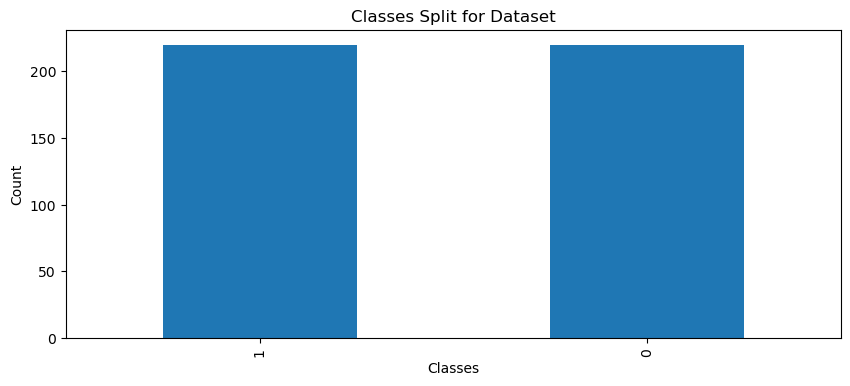

In [94]:
print('Class Split')
print(df_S1['Y'].value_counts())
df_S1['Y'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

##### Checking if Data is Normally Distributed in these Indepedent variables 

In [191]:
from scipy.stats import shapiro

##### Normality test - Shapiro-Wilk Test

In [192]:
def normality_test(df):
    alpha = 0.05
    for col in df.columns:
        try:
            stat, p = shapiro(df[col])
            print(f"Column: {col}")
            print(f"  Statistics={stat:.3f}, p={p:.3f}")
            if p > alpha:
                print("  Sample looks Gaussian (fail to reject H0)")
            else:
                print("  Sample does not look Gaussian (reject H0)")
        except Exception as e:
            print(f"  Could not perform test for column {col}: {e}")


In [193]:
normality_test(df)

Column: Y
  Statistics=0.167, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X1
  Statistics=0.937, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X2
  Statistics=0.895, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X3
  Statistics=0.918, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X4
  Statistics=0.606, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X5
  Statistics=0.605, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X6
  Statistics=0.007, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X7
  Statistics=0.014, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X8
  Statistics=0.013, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X9
  Statistics=0.017, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X10
  Statistics=0.013, p=0.000
  Sample does not look Gaussian (reject H0)
Column: X11
  Statistics=0.647, p=0.000
  Sample does not look Gaussian (reject H0)
Col

C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


#### FINAL RESULT OF EDA & DATA PRE_PROCESSING: 
+ No Missing Values
+ Outlier (Values > 3 Standard Deviation ) present in most of the columns (86 columns / 95) (DIdnt treated that because we dont know that they are real Outliers or Valid Values) 
+ Imbalance Dataset is being Balanced. (Didnt use Oversampling Technique like SMOTE as this will cause significant imbalance)
+ None of the column is NORMALLY DISTRIBUTED as per Shapiro-Wilk Test.

#### MODEL BUILDING

## LOGISTIC REGRESSION

### Checking Assumptions of Logistic Regression Model

###### Since Logistic Regression is a Parametric Supervised Model, it has some assumption:

1. Observations to be independent of each other. – Passed – Since each record taken is of individual user data, the observations are independent of each other.

2. Little or No multicollinearity among the independent variables

3. Assumes linearity of independent variables and log odds.

4. Large Sample Size – Failed
+ Minimum Threshold = 10
+ Records in minority class (B)- 220
+ Number of Independent Variables (C) – 95
+ B/C < A = 2.3 < 10, Not Enough records
+ Our dataset – 440 records 

###### Assumption 1 : Outliers Check 

##### Result : Fail - Since there are Outliers in most of the columns 

###### Assumption 2 : Checking for Multi-Collinearity

In [98]:
#Correlation Columns with Output
cor = df_S1.corr()
cor_target = abs(cor['Y'])

cor_target[cor_target > 0.5]

Y      1.000000
X1     0.530087
X2     0.518604
X3     0.526682
X16    0.521484
X17    0.521164
X18    0.517060
X19    0.564817
X23    0.565243
X37    0.616173
X38    0.616173
X43    0.561982
X60    0.624348
X68    0.518208
X69    0.564367
X86    0.501315
Name: Y, dtype: float64

##### Correlation between Independent Columns

In [99]:
def correlation(data,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=data.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names

In [100]:
col=correlation(df_S1,0.5)
print('Correlated columns @ 0.5:', col)

Correlated columns @ 0.5: [('X1', 'Y'), ('X2', 'Y'), ('X2', 'X1'), ('X3', 'Y'), ('X3', 'X1'), ('X3', 'X2'), ('X5', 'X4'), ('X8', 'X7'), ('X9', 'X7'), ('X9', 'X8'), ('X10', 'X7'), ('X10', 'X8'), ('X10', 'X9'), ('X16', 'Y'), ('X16', 'X1'), ('X16', 'X2'), ('X16', 'X3'), ('X17', 'Y'), ('X17', 'X1'), ('X17', 'X2'), ('X17', 'X3'), ('X17', 'X16'), ('X18', 'Y'), ('X18', 'X1'), ('X18', 'X2'), ('X18', 'X3'), ('X18', 'X16'), ('X18', 'X17'), ('X19', 'Y'), ('X19', 'X1'), ('X19', 'X2'), ('X19', 'X3'), ('X19', 'X16'), ('X19', 'X17'), ('X19', 'X18'), ('X22', 'X1'), ('X22', 'X2'), ('X22', 'X3'), ('X22', 'X16'), ('X22', 'X17'), ('X22', 'X18'), ('X22', 'X19'), ('X23', 'Y'), ('X23', 'X1'), ('X23', 'X2'), ('X23', 'X3'), ('X23', 'X16'), ('X23', 'X17'), ('X23', 'X18'), ('X23', 'X19'), ('X23', 'X22'), ('X26', 'X25'), ('X27', 'X25'), ('X27', 'X26'), ('X31', 'X1'), ('X31', 'X2'), ('X31', 'X3'), ('X31', 'X19'), ('X31', 'X23'), ('X34', 'X7'), ('X34', 'X8'), ('X34', 'X9'), ('X34', 'X10'), ('X36', 'X33'), ('X37', '

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [102]:
X = add_constant(df_S1)

In [103]:
X

Y        X1        X2        X3        X4        X5        X6        X7  \
0    1  0.370594  0.424389  0.405750  0.601457  0.601457  0.998969  0.796887   
1    1  0.464291  0.538214  0.516730  0.610235  0.610235  0.998946  0.797380   
2    1  0.426071  0.499019  0.472295  0.601450  0.601364  0.998857  0.796403   
3    1  0.399844  0.451265  0.457733  0.583541  0.583541  0.998700  0.796967   
4    1  0.465022  0.538432  0.522298  0.598783  0.598783  0.998973  0.797366   
..  ..       ...       ...       ...       ...       ...       ...       ...   
435  0  0.421148  0.482338  0.468440  0.593191  0.593508  0.998879  0.796707   
436  0  0.438844  0.538705  0.490658  0.602618  0.602589  0.998821  0.797382   
437  0  0.446156  0.548790  0.497296  0.593998  0.594308  0.998860  0.797446   
438  0  0.462243  0.516736  0.514321  0.599101  0.599101  0.998952  0.797021   
439  0  0.484327  0.544320  0.536164  0.598683  0.598683  0.998998  0.797431   

           X8        X9  ...       X86       X87       X88       X89  \
0    0.808809  0.302646  ...  0.716845  0.009219  0.622879  0.601453   
1    0.809301  0.303556  ...  0.795297  0.008323  0.623652  0.610237   
2    0.808388  0.302035  ...  0.774670  0.040003  0.623841  0.601449   
3    0.808966  0.303350  ...  0.739555  0.003252  0.622929  0.583538   
4    0.809304  0.303475  ...  0.795016  0.003878  0.623521  0.598782   
..        ...       ...  ...       ...       ...       ...       ...   
435  0.808658  0.302520  ...  0.762916  0.012598  0.620425  0.593188   
436  0.809340  0.303821  ...  0.798549  0.007288  0.623517  0.602619   
437  0.809371  0.303851  ...  0.804555  0.004424  0.623741  0.593998   
438  0.808966  0.302916  ...  0.785206  0.007678  0.615199  0.599101   
439  0.809346  0.303537  ...  0.801743  0.003956  0.619938  0.598680   

          X90       X91       X92       X93  X94       X95  
0    0.827890  0.290202  0.026601  0.564050    1  0.016469  
1    0.839969  0.283846  0.264577  0.570175    1  0.020794  
2    0.836774  0.290189  0.026555  0.563706    1  0.016474  
3    0.834697  0.281721  0.026697  0.564663    1  0.023982  
4    0.839973  0.278514  0.024752  0.575617    1  0.035490  
..        ...       ...       ...       ...  ...       ...  
435  0.837151  0.280673  0.026664  0.564468    1  0.026388  
436  0.840211  0.277540  0.048821  0.569967    1  0.044094  
437  0.840584  0.277174  0.027053  0.566159    1  0.049059  
438  0.839053  0.281312  0.026354  0.561610    1  0.024831  
439  0.840474  0.278854  0.027134  0.566391    1  0.033430  

[440 rows x 96 columns]

In [104]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

In [105]:
calc_vif(X)

C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


variables           VIF
0          Y  3.783848e+00
1         X1  1.763116e+02
2         X2  1.946981e+02
3         X3  4.247414e+02
4         X4  3.795240e+07
..       ...           ...
91       X91  3.226589e+03
92       X92  1.145136e+00
93       X93  1.253956e+00
94       X94  0.000000e+00
95       X95  5.157952e+01

[96 rows x 2 columns]

###### Result : We have variables with VIF as high as inf

##### Result : FAIL - Presence of Multi-Colinearity between the columns and with the Target columns 

In [106]:
VIF = calc_vif(X)  
output_file = 'VIF_Check.xlsx'
VIF.to_excel(output_file)
print(f"VIF results has been saved to {output_file}")

C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Null() results has been saved to VIF_Check.xlsx


C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


##### Assumption 3: Assumes linearity of independent variables and log odds

In [107]:
from statsmodels.api import Logit, add_constant

In [142]:
def box_tidwell_test(df, dependent_var, independent_vars):
    # Access dependent variable
    if isinstance(dependent_var, pd.Series):
        dependent_var = dependent_var.name
    
    X = df[independent_vars].copy()
    
    # Adjust small or zero values to avoid log(0)
    X = X.applymap(lambda x: x + 1e-10 if x == 0 else x)
    
    # Add constant term
    X = add_constant(X, has_constant='add')  # Add intercept
    y = df[dependent_var]  # Access dependent variable

    for var in independent_vars:
        # Create interaction term (X * log(X))
        if (X[var] > 0).all():  # Check for non-positive values
            X[f'{var}_log'] = X[var] * np.log(X[var])
        else:
            print(f"Skipping variable {var} due to non-positive values.")
            continue

        # Check if required columns exist
        required_columns = [var, f'{var}_log', 'const']
        if all(col in X.columns for col in required_columns):
            try:
                # Fit logistic regression model
                model = Logit(y, X[required_columns]).fit(disp=False)
                
                # Extract interaction term's p-value
                interaction_pval = model.pvalues.get(f'{var}_log', None)
                if interaction_pval is not None:
                    print(f'Variable: {var}, Interaction p-value: {interaction_pval:.5f}')
                else:
                    print(f'Variable: {var}, Interaction term not found in model.')
            except Exception as e:
                print(f"Error with variable {var}: {e}")
        else:
            print(f"Required columns for variable {var} are missing.")
    print("Box-Tidwell transformation test completed.")

In [110]:
variables = [f'X{i}' for i in range(1, 96)]
print(variables)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95']


In [109]:
df_S1.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71',
       'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81',
       'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91',
       'X92', 'X93', 'X94', 'X95'],
      dtype='object')

In [115]:
df_S1.drop(columns = 'X94')

Y        X1        X2        X3        X4        X5        X6        X7  \
0    1  0.370594  0.424389  0.405750  0.601457  0.601457  0.998969  0.796887   
1    1  0.464291  0.538214  0.516730  0.610235  0.610235  0.998946  0.797380   
2    1  0.426071  0.499019  0.472295  0.601450  0.601364  0.998857  0.796403   
3    1  0.399844  0.451265  0.457733  0.583541  0.583541  0.998700  0.796967   
4    1  0.465022  0.538432  0.522298  0.598783  0.598783  0.998973  0.797366   
..  ..       ...       ...       ...       ...       ...       ...       ...   
435  0  0.421148  0.482338  0.468440  0.593191  0.593508  0.998879  0.796707   
436  0  0.438844  0.538705  0.490658  0.602618  0.602589  0.998821  0.797382   
437  0  0.446156  0.548790  0.497296  0.593998  0.594308  0.998860  0.797446   
438  0  0.462243  0.516736  0.514321  0.599101  0.599101  0.998952  0.797021   
439  0  0.484327  0.544320  0.536164  0.598683  0.598683  0.998998  0.797431   

           X8        X9  ...  X85       X86       X87       X88       X89  \
0    0.808809  0.302646  ...    0  0.716845  0.009219  0.622879  0.601453   
1    0.809301  0.303556  ...    0  0.795297  0.008323  0.623652  0.610237   
2    0.808388  0.302035  ...    0  0.774670  0.040003  0.623841  0.601449   
3    0.808966  0.303350  ...    0  0.739555  0.003252  0.622929  0.583538   
4    0.809304  0.303475  ...    0  0.795016  0.003878  0.623521  0.598782   
..        ...       ...  ...  ...       ...       ...       ...       ...   
435  0.808658  0.302520  ...    0  0.762916  0.012598  0.620425  0.593188   
436  0.809340  0.303821  ...    0  0.798549  0.007288  0.623517  0.602619   
437  0.809371  0.303851  ...    0  0.804555  0.004424  0.623741  0.593998   
438  0.808966  0.302916  ...    0  0.785206  0.007678  0.615199  0.599101   
439  0.809346  0.303537  ...    0  0.801743  0.003956  0.619938  0.598680   

          X90       X91       X92       X93       X95  
0    0.827890  0.290202  0.026601  0.564050  0.016469  
1    0.839969  0.283846  0.264577  0.570175  0.020794  
2    0.836774  0.290189  0.026555  0.563706  0.016474  
3    0.834697  0.281721  0.026697  0.564663  0.023982  
4    0.839973  0.278514  0.024752  0.575617  0.035490  
..        ...       ...       ...       ...       ...  
435  0.837151  0.280673  0.026664  0.564468  0.026388  
436  0.840211  0.277540  0.048821  0.569967  0.044094  
437  0.840584  0.277174  0.027053  0.566159  0.049059  
438  0.839053  0.281312  0.026354  0.561610  0.024831  
439  0.840474  0.278854  0.027134  0.566391  0.033430  

[440 rows x 95 columns]

In [143]:
box_tidwell_test(df_S1, 'Y', variables)

Variable: X1, Interaction p-value: 0.83131
Variable: X2, Interaction p-value: 0.01072
Variable: X3, Interaction p-value: 0.97478
Variable: X4, Interaction p-value: 0.00001
Variable: X5, Interaction p-value: 0.00001
Variable: X6, Interaction p-value: 0.99885
Variable: X7, Interaction p-value: 0.99809
Variable: X8, Interaction p-value: 0.99455
Variable: X9, Interaction p-value: 0.99729
Variable: X10, Interaction p-value: 0.99770
Variable: X11, Interaction p-value: 0.45885
Variable: X12, Interaction p-value: 0.00084
Error with variable X13: Singular matrix
Variable: X14, Interaction p-value: 0.43218


C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.c

Variable: X15, Interaction p-value: 0.00000
Variable: X16, Interaction p-value: 0.00000
Variable: X17, Interaction p-value: 0.00000
Variable: X18, Interaction p-value: 0.00000
Variable: X19, Interaction p-value: 0.50232
Variable: X20, Interaction p-value: 0.00000
Variable: X21, Interaction p-value: 0.00833
Variable: X22, Interaction p-value: 0.00000
Variable: X23, Interaction p-value: 0.44116
Variable: X24, Interaction p-value: 0.24066
Variable: X25, Interaction p-value: 0.97238
Variable: X26, Interaction p-value: 0.00057
Variable: X27, Interaction p-value: 0.00212
Variable: X28, Interaction p-value: 0.99416
Variable: X29, Interaction p-value: 0.00000
Variable: X30, Interaction p-value: nan


C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimiz

Variable: X31, Interaction p-value: 0.00000
Variable: X32, Interaction p-value: 0.00000
Variable: X33, Interaction p-value: 0.00000
Variable: X34, Interaction p-value: 0.00000
Variable: X35, Interaction p-value: 0.61254
Error with variable X36: Singular matrix
Variable: X37, Interaction p-value: 0.00005
Variable: X38, Interaction p-value: 0.00738
Variable: X39, Interaction p-value: 0.00000
Variable: X40, Interaction p-value: 0.00056
Variable: X41, Interaction p-value: 0.00633
Variable: X42, Interaction p-value: 0.00000


C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimiz

Variable: X43, Interaction p-value: 0.46009
Error with variable X44: Singular matrix
Variable: X45, Interaction p-value: 0.00002
Error with variable X46: Singular matrix
Variable: X47, Interaction p-value: 0.00000
Variable: X48, Interaction p-value: 0.00041
Variable: X49, Interaction p-value: 0.00279
Variable: X50, Interaction p-value: 0.32377
Error with variable X51: Singular matrix
Variable: X52, Interaction p-value: 0.00000
Variable: X53, Interaction p-value: 0.00432
Variable: X54, Interaction p-value: 0.00000
Variable: X55, Interaction p-value: 0.00000
Variable: X56, Interaction p-value: 0.00001
Variable: X57, Interaction p-value: 0.01822
Variable: X58, Interaction p-value: 0.00000
Variable: X59, Interaction p-value: 0.99814
Variable: X60, Interaction p-value: 0.12742


C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_

Error with variable X61: Singular matrix
Variable: X62, Interaction p-value: 0.27052
Variable: X63, Interaction p-value: 0.99867
Variable: X64, Interaction p-value: 0.10496
Variable: X65, Interaction p-value: 0.00000
Variable: X66, Interaction p-value: 0.00000
Variable: X67, Interaction p-value: 0.71179
Variable: X68, Interaction p-value: 0.00000
Variable: X69, Interaction p-value: 0.89086
Variable: X70, Interaction p-value: 0.46576
Variable: X71, Interaction p-value: 0.69586
Variable: X72, Interaction p-value: 0.13439
Variable: X73, Interaction p-value: 0.18195
Variable: X74, Interaction p-value: 0.72657


C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimiz

Variable: X75, Interaction p-value: 0.99975
Variable: X76, Interaction p-value: 0.02604
Variable: X77, Interaction p-value: 0.10496
Variable: X78, Interaction p-value: 0.00000
Variable: X79, Interaction p-value: 0.00165
Variable: X80, Interaction p-value: 0.83646
Variable: X81, Interaction p-value: 0.89219
Variable: X82, Interaction p-value: 0.00000
Variable: X83, Interaction p-value: 0.00265
Variable: X84, Interaction p-value: 0.23827
Variable: X85, Interaction p-value: 1.00000
Variable: X86, Interaction p-value: 0.00004
Variable: X87, Interaction p-value: 0.96396
Variable: X88, Interaction p-value: 0.06509
Variable: X89, Interaction p-value: 0.00001
Error with variable X90: Singular matrix
Error with variable X91: Singular matrix
Variable: X92, Interaction p-value: 0.35046
Variable: X93, Interaction p-value: 0.35064
Error with variable X94: Singular matrix
Error with variable X95: Singular matrix
Box-Tidwell transformation test completed.


C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np

###### Result : Non-Linearity between Log Odds and most of the variables

### MODEL Building

#### SAMPLE 1

##### Preparing data for our ML Model , variable (x) has all the independent columns data and variable (Y) has the records for our dependent variable (Target). to_numpy() - We have converted these dataframes into numpy array because machine learning libraries expect input data to be in the form of Numpy Array

In [144]:
x = df_S1.drop('Y', axis=1).to_numpy()
Y = df_S1['Y'].to_numpy()


##### Splitting of the shuffled data into Train and Test Set ;  Stratified = Y means that class distribution ( in our case,220 for each category) will remain as it is in both our training and test dataset ; random_state = 100 means that it will keep the sequence of records taken as it is (for example if it has taken row 0,2,5; next time too it will take the same row number, but records in these rows will be shuffled)

In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.20,stratify=Y,random_state=100)

##### StandardScaler() will scale the data in a way that mean of data will be 0 with standard deviation as 1 for each feature / independent variable. fit_transform() will calculate mean and SD for the feature, transform function will scale the value based on the formula used for standardization (X-mean)/sd 

In [146]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
from sklearn.metrics import classification_report, confusion_matrix

In [149]:
for name,method in [('LogReg', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))  


Estimator: LogReg
[[40  4]
 [ 6 38]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        44
           1       0.90      0.86      0.88        44

    accuracy                           0.89        88
   macro avg       0.89      0.89      0.89        88
weighted avg       0.89      0.89      0.89        88



###### SAMPLE 2 

In [158]:
x2 = df_S2.drop('Y', axis=1).to_numpy()
Y2 = df_S2['Y'].to_numpy()

In [159]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, Y2, test_size=0.20,stratify=Y,random_state=100)

In [160]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train22 = sc.fit_transform(x_train2)
x_test22 = sc.transform(x_test2)

In [183]:
for name,method in [('LogReg2', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))]: 
    method.fit(x_train22,y_train2)
    predict = method.predict(x_test22)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test2,predict))  
    print(classification_report(y_test2,predict))


Estimator: LogReg2
[[40  4]
 [ 7 37]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        44
           1       0.90      0.84      0.87        44

    accuracy                           0.88        88
   macro avg       0.88      0.88      0.87        88
weighted avg       0.88      0.88      0.87        88



###### SAMPLE 3 

In [162]:
x3 = df_S3.drop('Y', axis=1).to_numpy()
Y3 = df_S3['Y'].to_numpy()


In [163]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, Y3, test_size=0.20,stratify=Y,random_state=100)

In [164]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train222 = sc.fit_transform(x_train3)
x_test222 = sc.transform(x_test3)

In [182]:
for name,method in [('LogReg3', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))]: 
    method.fit(x_train222,y_train3)
    predict = method.predict(x_test222)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test3,predict))  
    print(classification_report(y_test3,predict))


Estimator: LogReg3
[[39  5]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
           1       0.89      0.93      0.91        44

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88



###### RESULT : Out of 3 Samples, the 3rd Sample (Sample taken from the middle) perform better than other two samples, so proceeding further with that sample

In [167]:
x3

array([[0.37059426, 0.42438945, 0.40574977, ..., 0.56405011, 1.        ,
        0.01646874],
       [0.46429094, 0.53821413, 0.51673002, ..., 0.57017495, 1.        ,
        0.02079431],
       [0.42607127, 0.49901875, 0.47229509, ..., 0.56370608, 1.        ,
        0.01647411],
       ...,
       [0.57051626, 0.60090493, 0.62460517, ..., 0.56528176, 1.        ,
        0.08684492],
       [0.6347682 , 0.72187091, 0.70560523, ..., 0.56515871, 1.        ,
        0.06290333],
       [0.41846634, 0.47715874, 0.46608491, ..., 0.56461827, 1.        ,
        0.0175951 ]])

In [174]:
Coef_List = method.coef_[0].tolist()

In [177]:
len(Coef_List)

95

In [178]:
Coef_List

[-0.8149999260926304,
 0.3222268360082716,
 -0.9348901360507322,
 0.012339921986549535,
 -0.00769220585117268,
 0.29497763140798516,
 0.204938236389063,
 0.0808607037605025,
 0.049371810033187344,
 0.09335457649628341,
 -0.2687462384621321,
 0.12893538000989826,
 -0.3425660746822102,
 0.018726384977964455,
 0.3102092889083402,
 -0.024727418418362294,
 0.2002405930135246,
 0.21696562738907788,
 -0.7702085047830446,
 -0.414952808217563,
 0.39896390722816416,
 0.24845609724752696,
 -0.30086568308012646,
 0.12506121653037772,
 -0.460080067174107,
 0.1743841340134535,
 0.208217716335438,
 -0.4635908418600141,
 -0.15113195513474664,
 5.551355605076459e-05,
 -0.14842654579226253,
 0.8308700746695872,
 -0.582032110991613,
 0.19639834398161343,
 0.16846215835089745,
 0.44688168225116814,
 0.5033324442771551,
 -0.5033324442771597,
 0.5739383104340785,
 0.2315621782565491,
 0.027589392381105002,
 0.28070671621003696,
 -0.22852201070639164,
 -0.025232274449276098,
 -0.9795690478123704,
 0.12738120

### L1-Regularized Logistic Regression

In [185]:
for name,method2 in [('LogReg_L1', LogisticRegression(penalty = 'l1',solver='liblinear',C=1.0,
                                               random_state=100,max_iter=1000))]: 
    method2.fit(x_train222,y_train3)
    predict = method2.predict(x_test222)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test3,predict))  
    print(classification_report(y_test3,predict))


Estimator: LogReg_L1
[[38  6]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        44
           1       0.87      0.93      0.90        44

    accuracy                           0.90        88
   macro avg       0.90      0.90      0.90        88
weighted avg       0.90      0.90      0.90        88



In [186]:
Coef_List2 = method2.coef_[0].tolist()

In [187]:
Coef_List2

[-1.3423842712795115,
 0.0,
 -1.7064922881926352,
 0.0,
 0.0,
 0.6306932593174368,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.3858785647859073,
 0.14588553841321564,
 0.0,
 0.0,
 0.52730294074954,
 0.0,
 0.0,
 0.22592429450352558,
 -0.7995755849750207,
 -0.9687256582283348,
 1.070054571226303,
 0.0,
 0.0,
 0.1453106459386857,
 -0.11952949406901825,
 0.0,
 0.39630354470437984,
 -0.15401659464745604,
 -0.09179582864038562,
 0.0,
 -0.07079500927810159,
 1.4996757108479695,
 -0.5475407224706156,
 0.0,
 0.19306865832543585,
 0.273234571453008,
 1.5774003947820996,
 -0.7223489618546843,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -2.061907403622037,
 0.0,
 0.0,
 -0.5077799736772707,
 -0.3954303446701408,
 0.0,
 0.0,
 0.19440854321444026,
 0.0,
 -0.07878983898321684,
 0.0,
 0.0,
 -0.6326053492161164,
 0.0,
 0.016924520570171256,
 0.0,
 0.0,
 0.0942404780574115,
 0.7188958967949615,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08721561965094421,
 0.38082481691155984,
 0.19947590266127999,
 0.0,
 -0.376931578483341,
 0.0,

### ELASTICNET-Regularized Logistic Regression

In [188]:
for name,method3 in [('LogReg_Elastic_Net', LogisticRegression(penalty = 'elasticnet',solver='saga',l1_ratio=0.5,C=1.0,
                                               random_state=100,max_iter=1000))]: 
    method3.fit(x_train222,y_train3)
    predict = method3.predict(x_test222)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test3,predict))  
    print(classification_report(y_test3,predict))


Estimator: LogReg_Elastic_Net
[[39  5]
 [ 2 42]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        44
           1       0.89      0.95      0.92        44

    accuracy                           0.92        88
   macro avg       0.92      0.92      0.92        88
weighted avg       0.92      0.92      0.92        88



C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##### REsult : Results of Elastic Net validated that there is Multi-Colinearity between the variables, which it handled , thus improving the model performance. Also Elastic Net works well with Non-Linear Relation.

In [189]:
Coef_List3 = method3.coef_[0].tolist()

In [190]:
Coef_List3

[-1.1520778836341572,
 0.0,
 -1.2578831480305104,
 0.0,
 0.0,
 0.5725260818090183,
 0.048660754186793644,
 0.0,
 0.0,
 0.0,
 -0.4534131306473721,
 0.22881000751905087,
 -0.4540476192319304,
 0.00043618654267088406,
 0.5194661561714115,
 0.0,
 0.18581284766619735,
 0.22582563410772696,
 -0.9690506124962672,
 -0.5481965254180758,
 0.6153788995943661,
 0.07025800840793407,
 -0.39344546895664634,
 0.1616129609846565,
 -0.40653812411608614,
 0.18625682984810235,
 0.25898762601129316,
 -0.27742269630699196,
 -0.21420887741227815,
 0.0,
 -0.19926876143274155,
 1.0117635930372773,
 -0.49090625991331016,
 0.0,
 0.22861210073157298,
 0.44621585540822467,
 1.0232785225671475,
 -1.0232785225671104,
 0.271720911975284,
 0.05516614393061707,
 0.0,
 0.09080616188570229,
 -0.2919679941922431,
 0.0,
 -1.4319739880349718,
 0.01102378039352816,
 0.0,
 -0.5282896252297707,
 -0.4530221005495388,
 0.0,
 0.011023781257125864,
 0.26862829371485536,
 0.0,
 -0.20542403474327567,
 -0.12660059410442226,
 0.0,
 -0

### Hyperparameteric Tunning of Elastic Net using Grid Search

In [196]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [194]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8, 1.0]
}

In [197]:
grid_search = GridSearchCV(
    LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, random_state=42),
    param_grid,
    scoring='accuracy',
    cv=5
)

In [198]:
grid_search.fit(x_train222,y_train3)

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='elasticnet',
                                          random_state=42, solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0.2, 0.5, 0.8, 1.0]},
             scoring='accuracy')

In [199]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'l1_ratio': 0.2}
Best Cross-Validation Accuracy: 0.9092152917505029


In [201]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test222)
print("\nEstimator:", confusion_matrix(y_test3,y_pred))
print("\nClassification Report:")
print(classification_report(y_test3,y_pred))


Estimator: [[41  3]
 [ 2 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.93      0.95      0.94        44

    accuracy                           0.94        88
   macro avg       0.94      0.94      0.94        88
weighted avg       0.94      0.94      0.94        88



#### Randomized Search for Elastic Net

In [202]:
from sklearn.model_selection import RandomizedSearchCV

In [203]:
param_distributions = {
    'C': np.logspace(-3, 3, 50),
    'l1_ratio': np.linspace(0.1, 1.0, 10)
}

In [204]:
random_search = RandomizedSearchCV(
    LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, random_state=42),
    param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42
)

In [205]:
random_search.fit(x_train222,y_train3)

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000,
                                                penalty='elasticnet',
                                                random_state=42,
                                                solver='saga'),
                   n_iter=50,
                   param_distributions={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.9470517...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                                        'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='accuracy')

In [206]:
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Best Parameters: {'l1_ratio': 0.2, 'C': 0.3727593720314938}
Best Cross-Validation Accuracy: 0.9120724346076459


In [207]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test222)
print("\nEstimator:", confusion_matrix(y_test3,y_pred))
print("\nClassification Report:")
print(classification_report(y_test3,y_pred))


Estimator: [[39  5]
 [ 1 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.90      0.98      0.93        44

    accuracy                           0.93        88
   macro avg       0.94      0.93      0.93        88
weighted avg       0.94      0.93      0.93        88



In [209]:
Coef_List4 = best_model.coef_[0].tolist()

In [210]:
Coef_List4

[-0.756751308182898,
 0.0,
 -0.8113687175797306,
 0.0,
 0.0,
 0.38684762639225123,
 0.027922947348113836,
 0.0,
 0.0,
 0.0,
 -0.3857518573436413,
 0.19288776965823196,
 -0.3416063226314695,
 -0.008208138138257746,
 0.42389269272498376,
 0.0,
 0.0797162654052026,
 0.1041866048500503,
 -0.6762187520018906,
 -0.3831830399908623,
 0.3835590093518186,
 0.0,
 -0.3647382605656951,
 0.1334352840576126,
 -0.2398010245324971,
 0.13256291523583896,
 0.17564043291455594,
 -0.18555237831329255,
 -0.1813918717312544,
 0.0,
 -0.236336636048615,
 0.6450718602337635,
 -0.26549695609354657,
 0.0,
 0.16823043784650285,
 0.33900291807667227,
 0.7786994565512403,
 -0.7786994565512471,
 0.12612316539357293,
 0.07547945892554846,
 0.0,
 0.0,
 -0.30054327778026924,
 0.0,
 -0.927072790505269,
 0.00928692394210352,
 0.0,
 -0.4352719755529153,
 -0.35119696761567326,
 0.0,
 0.009286924412393793,
 0.14533656254107288,
 0.0,
 -0.2668317966275239,
 -0.14566299983101288,
 0.0,
 -0.7644171143409174,
 0.0,
 0.007444097

### GOING WITH NON-PARAMETRIC MODELS - Decision Tree & Random Forest

#### Since they are non-parametric, they dont have any pre-assumptions

#### DECISION TREE

In [208]:
df_S3

Y        X1        X2        X3        X4        X5        X6        X7  \
0    1  0.370594  0.424389  0.405750  0.601457  0.601457  0.998969  0.796887   
1    1  0.464291  0.538214  0.516730  0.610235  0.610235  0.998946  0.797380   
2    1  0.426071  0.499019  0.472295  0.601450  0.601364  0.998857  0.796403   
3    1  0.399844  0.451265  0.457733  0.583541  0.583541  0.998700  0.796967   
4    1  0.465022  0.538432  0.522298  0.598783  0.598783  0.998973  0.797366   
..  ..       ...       ...       ...       ...       ...       ...       ...   
435  0  0.551163  0.617804  0.612131  0.618681  0.618681  0.999112  0.797562   
436  0  0.598694  0.660979  0.662027  0.624404  0.624404  0.999209  0.797637   
437  0  0.570516  0.600905  0.624605  0.619251  0.619251  0.999264  0.797744   
438  0  0.634768  0.721871  0.705605  0.622191  0.622191  0.999295  0.797765   
439  0  0.418466  0.477159  0.466085  0.597984  0.598113  0.998954  0.797280   

           X8        X9  ...       X86       X87       X88       X89  \
0    0.808809  0.302646  ...  0.716845  0.009219  0.622879  0.601453   
1    0.809301  0.303556  ...  0.795297  0.008323  0.623652  0.610237   
2    0.808388  0.302035  ...  0.774670  0.040003  0.623841  0.601449   
3    0.808966  0.303350  ...  0.739555  0.003252  0.622929  0.583538   
4    0.809304  0.303475  ...  0.795016  0.003878  0.623521  0.598782   
..        ...       ...  ...       ...       ...       ...       ...   
435  0.809478  0.303528  ...  0.842604  0.000937  0.623989  0.618683   
436  0.809545  0.303456  ...  0.859317  0.001279  0.624090  0.624402   
437  0.809610  0.303525  ...  0.833060  0.000816  0.622540  0.619251   
438  0.809673  0.303498  ...  0.887702  0.001769  0.624474  0.622189   
439  0.809212  0.303366  ...  0.762374  0.000745  0.623772  0.597983   

          X90       X91       X92       X93  X94       X95  
0    0.827890  0.290202  0.026601  0.564050    1  0.016469  
1    0.839969  0.283846  0.264577  0.570175    1  0.020794  
2    0.836774  0.290189  0.026555  0.563706    1  0.016474  
3    0.834697  0.281721  0.026697  0.564663    1  0.023982  
4    0.839973  0.278514  0.024752  0.575617    1  0.035490  
..        ...       ...       ...       ...  ...       ...  
435  0.842758  0.276462  0.026794  0.565171    1  0.064606  
436  0.843819  0.276661  0.026791  0.565158    1  0.059136  
437  0.842069  0.275945  0.026818  0.565282    1  0.086845  
438  0.845422  0.276519  0.026791  0.565159    1  0.062903  
439  0.835437  0.287828  0.026689  0.564618    1  0.017595  

[440 rows x 96 columns]

In [212]:
from sklearn.tree import DecisionTreeClassifier

In [213]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [214]:
clf.fit(x_train222,y_train3)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [215]:
y_pred = clf.predict(x_test222)

In [216]:
print("Estimator : DT :\n", confusion_matrix(y_test3,y_pred))
print("\nClassification Report:\n", classification_report(y_test3,y_pred))

Estimator : DT :
 [[41  3]
 [ 5 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        44
           1       0.93      0.89      0.91        44

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88



In [225]:
clf.feature_importances_.tolist()

[0.0,
 0.0,
 0.692761387953788,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.055633782478204566,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08377279851467932,
 0.0,
 0.0,
 0.0,
 0.0,
 0.10921933539365523,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.020602407918735865,
 0.0,
 0.0,
 0.0,
 0.0,
 0.024373455832821304,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.013636831908115647,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

#### RANDOM FOREST

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [220]:
rf_classifier.fit(x_train222,y_train3)

RandomForestClassifier(random_state=42)

In [221]:
y_pred = rf_classifier.predict(x_test222)

In [222]:
print("\nEstimator: Random Forest ", confusion_matrix(y_test3,y_pred))
print("\nClassification Report:")
print(classification_report(y_test3,y_pred))


Estimator: Random Forest  [[40  4]
 [ 1 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.91      0.98      0.95        44

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



In [224]:
rf_classifier.feature_importances_.tolist()

[0.07578622876109276,
 0.023301436974595195,
 0.06692058981161908,
 0.007085567262319617,
 0.004301312819123595,
 0.011840785786688566,
 0.023134773397668368,
 0.04230207136383433,
 0.0072829962243721414,
 0.04276330013091806,
 0.00313107080188402,
 0.0031712929715238913,
 0.006819208388901643,
 0.000900873148144917,
 0.0031675436853600123,
 0.0014967919046499536,
 0.0020564857597213694,
 0.003404731914355982,
 0.032984715313336625,
 0.0051795907410218224,
 0.0030630992544246837,
 0.001376681131865213,
 0.016931787279720636,
 0.004762309594717744,
 0.003739340203883263,
 0.004543159191248282,
 0.006040717666982309,
 0.006055149132276169,
 0.005513689268502293,
 0.0,
 0.006313428111480974,
 0.0043113235269884075,
 0.028220028581754684,
 0.0,
 0.018432975040143348,
 0.0,
 0.0415944550304331,
 0.055864521032359046,
 0.0027173804517563118,
 0.04027763643749369,
 0.0010195026835839865,
 0.0037277555536714855,
 0.018598428187972985,
 0.0024940185855476856,
 0.005766704665894132,
 0.0,
 0.0,


In [227]:
pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -------------------------- ------------- 307.2/456.1 kB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 7.2 MB/s eta 0:00:00


In [228]:
import shap

In [264]:
explainer = shap.TreeExplainer(rf_classifier)

In [265]:
shap_values = explainer.shap_values(x)

In [266]:
shap_values.tolist()

[[[0.040297217895522784, -0.040297217895522805],
  [0.012373515531107734, -0.012373515531107746],
  [0.0475729473652293, -0.047572947365229296],
  [0.000805953752286915, -0.0008059537522869142],
  [0.006286172335807057, -0.006286172335807057],
  [-0.002388056982017837, 0.0023880569820178377],
  [0.01202160217885634, -0.012021602178856347],
  [0.017356310728022545, -0.01735631072802253],
  [0.008962696124581601, -0.008962696124581603],
  [0.02683569850779177, -0.026835698507791796],
  [-0.0007648942864265569, 0.0007648942864265567],
  [-0.0006480935821039259, 0.0006480935821039266],
  [0.005763249209612728, -0.005763249209612729],
  [-0.00010118870270699973, 0.00010118870270699987],
  [-0.005316571410786015, 0.005316571410786017],
  [-4.294746637859744e-05, 4.2947466378597465e-05],
  [-4.563448485419032e-05, 4.563448485418973e-05],
  [-3.7732617851569126e-06, 3.773261785155991e-06],
  [0.01234650724153257, -0.012346507241532577],
  [0.0028143370793501108, -0.0028143370793501103],
  [0.0

In [229]:
from sklearn.feature_selection import RFECV

In [234]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [235]:
rfecv = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')

In [236]:
rfecv.fit(x_train222,y_train3)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=42),
      scoring='accuracy')

In [241]:
print("Optimal Number of Features:", rfecv.n_features_)

Optimal Number of Features: 18


In [247]:
x_train222

array([[-3.54321729e-01, -4.42933499e-01, -3.08755791e-01, ...,
         1.10683790e-03,  0.00000000e+00,  3.12362032e-01],
       [-6.33423434e-01, -4.42018801e-01, -5.90491875e-01, ...,
        -4.52089174e-01,  0.00000000e+00, -4.65114402e-01],
       [-3.28370167e-01, -2.30266172e-01, -3.14183281e-01, ...,
        -3.35449065e-01,  0.00000000e+00, -4.29348576e-01],
       ...,
       [ 3.87480358e+00,  3.52182577e+00,  3.73028377e+00, ...,
         3.42593633e-02,  0.00000000e+00,  5.21907077e-01],
       [-1.59265193e+00, -1.84745256e+00, -1.68141741e+00, ...,
         2.31851561e-02,  0.00000000e+00, -4.08653037e-01],
       [ 9.30525419e-01,  1.00228963e+00,  9.84467112e-01, ...,
         4.01947852e-02,  0.00000000e+00,  6.72135205e-01]])

In [250]:
FN = df_S3.columns[1:]

In [251]:
selected_features = FN[rfecv.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['X1', 'X2', 'X3', 'X7', 'X8', 'X10', 'X19', 'X35', 'X37', 'X38', 'X40',
       'X57', 'X58', 'X69', 'X84', 'X86', 'X92', 'X95'],
      dtype='object')


In [257]:
FN2 = FN.tolist()

In [258]:
selected_indices = [FN2.index(name) for name in selected_features]

In [259]:
rf_model.fit(x_train222[:, selected_indices], y_train3)

RandomForestClassifier(random_state=42)

In [261]:
y_pred = rf_model.predict(x_test222[:, selected_indices])

In [262]:
print("\nEstimator: Random Forest with RFECV ", confusion_matrix(y_test3,y_pred))
print("\nClassification Report:")
print(classification_report(y_test3,y_pred))


Estimator: Random Forest with RFECV  [[40  4]
 [ 2 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.91      0.95      0.93        44

    accuracy                           0.93        88
   macro avg       0.93      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88



##### PCA with Random Forest

In [267]:
from sklearn.decomposition import PCA

In [268]:
from sklearn.model_selection import cross_val_score

In [269]:
from sklearn.pipeline import Pipeline

In [270]:
ax = df_S3.drop(columns='Y')
wy = df_S3['Y']

In [272]:
scaler = StandardScaler()

In [273]:
ax_scaled = scaler.fit_transform(ax)

In [274]:
max_components = min(ax_scaled.shape[1], 10)

In [275]:
max_components

10

In [276]:
mean_scores = []

In [280]:
for n_components in range(1, max_components + 1):
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    scores = cross_val_score(pipeline, ax_scaled, y, cv=5, scoring='accuracy')
    mean_scores.append(np.mean(scores))

In [281]:
optimal_components = np.argmax(mean_scores) + 1

In [282]:
optimal_components

7

In [283]:
pca_final = PCA(n_components=optimal_components)

In [284]:
X_pca = pca_final.fit_transform(ax_scaled)

In [285]:
final_model = RandomForestClassifier(random_state=42)

In [286]:
final_model.fit(X_pca, wy)

RandomForestClassifier(random_state=42)

In [289]:
for n, score in enumerate(mean_scores, start=1):
    print(f"Number of Components: {n}, Cross-Validation Accuracy: {score:.4f}")

Number of Components: 1, Cross-Validation Accuracy: 0.7977
Number of Components: 2, Cross-Validation Accuracy: 0.8795
Number of Components: 3, Cross-Validation Accuracy: 0.8864
Number of Components: 4, Cross-Validation Accuracy: 0.8841
Number of Components: 5, Cross-Validation Accuracy: 0.8773
Number of Components: 6, Cross-Validation Accuracy: 0.8795
Number of Components: 7, Cross-Validation Accuracy: 0.8886
Number of Components: 8, Cross-Validation Accuracy: 0.8795
Number of Components: 9, Cross-Validation Accuracy: 0.8864
Number of Components: 10, Cross-Validation Accuracy: 0.8818


In [291]:
X_pca[:5]

array([[-4.28663103, -0.14744112, -1.06082265,  0.93776625, -0.08775601,
         0.01902524, -0.23702454],
       [-0.85758797,  0.07598084, -2.38530527,  3.16558897, -1.11488869,
         0.40400323,  1.23148249],
       [-1.91974915, -0.5791155 , -0.56492313,  1.39630108, -0.9679425 ,
         1.06590751,  0.93682091],
       [-3.67479006, -0.44817541, -2.11839772,  1.70501905, -1.39546474,
         0.01281366,  0.37056583],
       [-0.74879888, -0.0874767 , -1.11840409,  0.06773882,  0.6661673 ,
        -0.18810994,  0.38198589]])

In [292]:
accuracy = final_model.score(X_pca, wy)
print(f"\nFinal Model Accuracy: {accuracy:.4f}")


Final Model Accuracy: 1.0000


In [293]:
print(pca_final.components_)

[[ 1.97653148e-01  1.98862539e-01  1.96539707e-01  1.52681381e-01
   1.52593632e-01  7.34041374e-02  7.20432147e-02  6.05265631e-02
   3.78565621e-02  6.72695941e-02  3.21283188e-03  2.77829007e-03
   1.23790604e-01  4.40910966e-03  5.31173252e-02  1.88027091e-01
   1.87986985e-01  1.87690456e-01  2.04617057e-01  1.29115177e-01
   2.96179441e-02  1.92943971e-01  2.05796798e-01  1.97336954e-02
   4.78075556e-02  6.49349865e-02  6.48369034e-02  1.74992521e-02
   5.72996220e-03 -2.29963362e-02  1.27537478e-01  5.18414329e-02
   1.28094322e-01 -1.36631448e-02  4.55402768e-03  7.21051344e-03
  -1.70888887e-01  1.70888887e-01  3.55694042e-03 -7.22652603e-02
  -4.33677642e-02  1.92821366e-01  2.04332698e-01 -4.79440347e-02
   3.94600205e-02 -1.17611111e-02 -4.02634221e-03  1.03173049e-02
  -2.51248755e-02 -4.78280257e-02 -1.17611111e-02  1.65676283e-01
  -4.02634215e-03  1.60256786e-01  1.03323060e-01  7.35241895e-02
   1.31810344e-01  1.25470014e-01 -1.91566727e-02 -1.44828635e-01
   1.19194

In [307]:
df3.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71',
       'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81',
       'X82', 'X83', 'X84', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92',
       'X93', 'X95'],
      dtype='object')

In [310]:
pca_final.components_.shape

(7, 95)

In [315]:
df_X = df.drop(columns='Y')

In [317]:
df_X.shape

(6819, 95)

In [318]:
df_X.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71',
       'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81',
       'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91',
       'X92', 'X93', 'X94', 'X95'],
      dtype='object')

In [313]:
df2.columns.shape

(96,)

In [319]:
feature_names = df_X.columns  # Or the list of feature names you used before applying PCA
pca_components_df = pd.DataFrame(pca_final.components_, columns=feature_names)

In [320]:
pca_components_df

X1        X2        X3        X4        X5        X6        X7  \
0  0.197653  0.198863  0.196540  0.152681  0.152594  0.073404  0.072043   
1  0.053927  0.066545  0.058751  0.030584  0.030414  0.065006  0.073333   
2 -0.077643 -0.071002 -0.078531  0.147273  0.147603 -0.176221 -0.266172   
3  0.081575  0.077934  0.085327  0.037344  0.037347 -0.048740 -0.186660   
4  0.052389  0.067318  0.052140  0.019956  0.019837  0.003935 -0.098648   
5 -0.001031  0.013320  0.002560  0.009511  0.009617 -0.014169  0.007590   
6 -0.038192  0.006647 -0.033864 -0.056055 -0.055915 -0.223307 -0.104067   

         X8        X9       X10  ...       X86       X87       X88       X89  \
0  0.060527  0.037857  0.067270  ...  0.190922 -0.028824 -0.006398  0.152682   
1  0.063580  0.045854  0.067035  ...  0.059304 -0.002725 -0.008366  0.030587   
2 -0.283074 -0.211453 -0.271684  ... -0.082486  0.039320  0.110169  0.147269   
3 -0.235404 -0.204694 -0.194227  ...  0.082231 -0.063856  0.093219  0.037350   
4 -0.144793 -0.130558 -0.099382  ...  0.049990  0.054300  0.084260  0.019953   
5  0.025407  0.020496  0.005950  ...  0.023584 -0.020552 -0.057373  0.009511   
6  0.004481  0.033706 -0.113881  ...  0.016006  0.068317 -0.120556 -0.056052   

        X90       X91       X92       X93  X94       X95  
0  0.074123 -0.072815 -0.002442  0.016638  0.0  0.095383  
1 -0.277905  0.336526  0.003117  0.003706 -0.0 -0.015688  
2 -0.083062  0.063810 -0.031025 -0.008541 -0.0  0.145695  
3  0.024898 -0.001272  0.041283  0.002872 -0.0 -0.050989  
4  0.048737 -0.019888 -0.006720  0.003682  0.0 -0.255134  
5  0.003649 -0.003207  0.003685 -0.006128  0.0 -0.000558  
6 -0.007000 -0.010924  0.019352  0.021429 -0.0 -0.130464  

[7 rows x 95 columns]

In [321]:
output_file = 'PCA.xlsx'

In [322]:
pca_components_df.to_excel(output_file)

### FINAL RESULT : LOGISTIC REGRESSION with ELASTIC Net  GridSearch is the most suitable model as it balances precision and recall very well for both categories, which is reflected in F1 SCore and Accuracy

## Submitted by : Shivam Dhawan
## Student ID      : 100935592
## Email ID          : shivam.dhawan@dcmail.ca